In [1]:
import pandas as pd
pd.options.display.max_columns=500
pd.options.display.max_colwidth=1000
import matplotlib.pyplot as plt

from collections import Counter
import seaborn as sns

# Analyse the correlation between mAP@K and the frequency/context diversity 

In [5]:


# source: SUBTLEXUS: https://www.ugent.be/pp/experimentele-psychologie/en/research/documents/subtlexus
def read_subtlexus():
    subtlex_path = "../data/SUBTLEX.US.POS.csv"
    df_freq = pd.read_csv(subtlex_path, sep='\t')
    df_freq = df_freq.dropna().reset_index()
    df_freq = df_freq[['Word', 'FREQcount', 'CDcount', 'FREQlow', 'Cdlow', 'SUBTLWF',
       'Lg10WF', 'SUBTLCD', 'Lg10CD', 'All_freqs_SUBTLEX']]
    vocab = set(df_freq['Word'])
    print(f"#Vocab: {len(vocab)}")

read_wordlex()
read_subtlexus()
# def calculate_wordlex_corr_freq_mAP():
#     path = 'Eng_US.Freq.2.txt'
#     df_freq = pd.read_csv(path, sep='\t')
#     display(df_freq.loc[df_freq['Word']=='the'])
#     print(df_freq.columns)
#     display(df_freq.head())

# #     path = 'exp_data_results_anchor_type_coordinate_max_anchor_num_10_anchor_scorer_freqProbLogSum.csv'
#     path = 'exp_data_results_anchor_type_coordinate_max_anchor_num_10_anchor_scorer_freqProbLogSum.LAMA.csv'
#     df = pd.read_csv(path)

#     intersection_words = list(set(df['sub_label']).intersection( set(df_freq['Word']))) #{'castenets', 'catapault', 'pennicillin'}
#     df = df.query(f"sub_label in {intersection_words}")

#     df_freq_inter = df_freq.query(f"Word in {intersection_words}")
#     df_freq_inter = df_freq_inter.rename(columns={'Word':'sub_label'})
#     display(df_freq_inter.head())

#     df = pd.merge(df, df_freq_inter, on=['sub_label'])
#     df.head()
#     methods = ['pearson', 'kendall', 'spearman']
#     for method in methods: 
#         print('-'*40, method, '-'*40)
#         for column in ['BlogFreq', 'BlogFreqPm', 'BlogCD', 'BlogCDPc', 'TwitterFreq',
#            'TwitterFreqPm', 'TwitterCD', 'TwitterCDPc', 'NewsFreq', 'NewsFreqPm',
#            'NewsCD', 'NewsCDPc']:
#             display(df[[column, 'ap10_lsp_dap']].corr(method=method))
#     return df 
# df = calculate_wordlex_corr_freq_mAP()    

Index(['Word', 'BlogFreq', 'BlogFreqPm', 'BlogCD', 'BlogCDPc', 'TwitterFreq',
       'TwitterFreqPm', 'TwitterCD', 'TwitterCDPc', 'NewsFreq', 'NewsFreqPm',
       'NewsCD', 'NewsCDPc'],
      dtype='object')


,Word,BlogFreq,BlogFreqPm,BlogCD,BlogCDPc,TwitterFreq,TwitterFreqPm,TwitterCD,TwitterCDPc,NewsFreq,NewsFreqPm,NewsCD,NewsCDPc
0,the,1858421,48736.7646,551853,61.3655,936798,30240.5631,728908,30.8840,1972448,56009.4483,748368,74.0781
1,and,1092431,28648.8113,472403,52.5308,438181,14144.8212,392405,16.6263,885289,25138.5834,531116,52.5731
2,to,1066354,27964.9465,456783,50.7939,787455,25419.6557,646622,27.3975,901187,25590.0215,528274,52.2918
3,i,905153,23737.4786,331383,36.8495,916882,29597.6592,686551,29.0893,194265,5516.3307,103389,10.2341
4,a,901071,23630.4289,422409,46.9715,612989,19787.7584,518874,21.9848,890652,25290.8706,520420,51.5144


#Vocab: 800071
#Vocab: 74093


In [10]:
# # source: WordLex http://www.lexique.org/?page_id=250 
def read_wordlex():
    path = '../data/Eng_US.Freq.2.txt'
    df_freq = pd.read_csv(path, sep='\t')
#     display(df_freq.loc[df_freq['Word']=='the'])
    print(df_freq.columns)
    display(df_freq.head())
    vocab = set(df_freq['Word'])
    print(f"#Vocab: {len(vocab)}")
    df_freq = df_freq.head()
    df_freq['FREQCount'] = df_freq[['BlogFreq', 'TwitterFreq', 'NewsFreq']].apply(lambda x: sum(x), axis=1)
    return df_freq 
df_freq = read_wordlex()
df_freq[['Word', 'FREQCount', 'BlogFreq', 'TwitterFreq', 'NewsFreq']].head()

Index(['Word', 'BlogFreq', 'BlogFreqPm', 'BlogCD', 'BlogCDPc', 'TwitterFreq',
       'TwitterFreqPm', 'TwitterCD', 'TwitterCDPc', 'NewsFreq', 'NewsFreqPm',
       'NewsCD', 'NewsCDPc'],
      dtype='object')


,Word,BlogFreq,BlogFreqPm,BlogCD,BlogCDPc,TwitterFreq,TwitterFreqPm,TwitterCD,TwitterCDPc,NewsFreq,NewsFreqPm,NewsCD,NewsCDPc
0,the,1858421,48736.7646,551853,61.3655,936798,30240.5631,728908,30.8840,1972448,56009.4483,748368,74.0781
1,and,1092431,28648.8113,472403,52.5308,438181,14144.8212,392405,16.6263,885289,25138.5834,531116,52.5731
2,to,1066354,27964.9465,456783,50.7939,787455,25419.6557,646622,27.3975,901187,25590.0215,528274,52.2918
3,i,905153,23737.4786,331383,36.8495,916882,29597.6592,686551,29.0893,194265,5516.3307,103389,10.2341
4,a,901071,23630.4289,422409,46.9715,612989,19787.7584,518874,21.9848,890652,25290.8706,520420,51.5144


#Vocab: 800071


,Word,FREQCount,BlogFreq,TwitterFreq,NewsFreq
0,the,4767667,1858421,936798,1972448
1,and,2415901,1092431,438181,885289
2,to,2754996,1066354,787455,901187
3,i,2016300,905153,916882,194265
4,a,2404712,901071,612989,890652


In [17]:
# source: SUBTLEXUS: https://www.ugent.be/pp/experimentele-psychologie/en/research/documents/subtlexus
# def calculate_SUBTLEX_corr_freq_mAP(result_path, display_corr):
#     subtlex_path = "./data/SUBTLEX.US.POS.csv"
#     df_freq = pd.read_csv(subtlex_path, sep='\t')
#     df_freq = df_freq.dropna().reset_index()
#     df_freq = df_freq[['Word', 'FREQcount', 'CDcount', 'FREQlow', 'Cdlow', 'SUBTLWF',
#        'Lg10WF', 'SUBTLCD', 'Lg10CD', 'All_freqs_SUBTLEX']]
#     if display_corr: 
#         print(df_freq.columns)
#         display(df_freq.head(1))

#     df = pd.read_csv(result_path)
#     intersection_words = list(set(df['sub_label']).intersection( set(df_freq['Word']))) #{'castenets', 'catapault', 'pennicillin'}
#     print(f"#Test sub_labels: {len(list(set(df['sub_label'])))}")
#     print(f"#intersections: {len(intersection_words)}")
    
#     df_unseen =  df.query(f"sub_label not in {intersection_words}")
#     df = df.query(f"sub_label in {intersection_words}")
    
    
#     df_freq_inter = df_freq.query(f"Word in {intersection_words}")
#     df_freq_inter = df_freq_inter.rename(columns={'Word':'sub_label'})
        

#     df = pd.merge(df, df_freq_inter, on=['sub_label'])
#     for col in ['FREQcount', 'CDcount', 'FREQlow', 'Cdlow', 'SUBTLWF',
#                'Lg10WF', 'SUBTLCD', 'Lg10CD', 'All_freqs_SUBTLEX']: 
#         df_unseen[col] = 0

#     if display_corr: 
#         display(df_freq_inter.head(1))
#         display(df.head(1))
#         methods = ['pearson', 'kendall', 'spearman']
#         for method in methods: 
#             print('-'*40, method, '-'*40)
#             for column in ['FREQcount', 'CDcount', 'FREQlow', 'Cdlow', 'SUBTLWF',
#                'Lg10WF', 'SUBTLCD', 'Lg10CD', 'All_freqs_SUBTLEX']:
#                 display(df[[column, 'ap10_lsp_dap']].corr(method=method))
#     df = pd.concat([df, df_unseen])
    
#     return df 

# path_clsb = 'exp_data_results_anchor_type_coordinate_max_anchor_num_10_anchor_scorer_freqProbLogSum.CLSB.csv'
# path_clsb = 'exp_data_results_anchor_type_coordinate_concate_or_single_max_anchor_num_5_anchor_scorer_freqProbLogSum.CLSB.csv'
# path_lama = 'exp_data_results_anchor_type_coordinate_max_anchor_num_10_anchor_scorer_freqProbLogSum.LAMA.csv'
path_clsb = 'exp_data_results_anchor_type_Coordinate_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg.WN.CPT.CLSB.csv'
path_lama ='exp_data_results_anchor_type_coordinate_concate_or_single_max_anchor_num_5_anchor_scorer_freqProbLogSum.LAMA.csv'
df = calculate_SUBTLEX_corr_freq_mAP(result_path=path_clsb, display_corr=False)

#Test sub_labels: 522
#intersections: 515


In [18]:
# df['FREQcount_type'] = df['FREQcount'].apply(lambda x: type(x))
# Counter(df['FREQcount_type'])
cut_labels = ["LOW", "MEDIUM", "FREQUENT"] #, "VERYFREQUENT"]
cut_bins = [0, 10, 100,  df[freq_col].max()] #5000,
df['sub_freq_level'] = pd.cut(df[freq_col], bins=cut_bins, labels=cut_labels).values.add_categories("UNSEEN")
df['sub_freq_level'].fillna(value='UNSEEN', inplace=True)

print(Counter(df['sub_freq_level']))

# df2 = df[pd.isnull(df['sub_freq_level'])]
# df2[['sub_label', 'FREQcount']]

Counter({'FREQUENT': 352, 'MEDIUM': 139, 'LOW': 24, 'UNSEEN': 7})


## Analyzing the correlation between frequency levels and performance

exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg.DIAGNOSTIC.csv
#Test sub_labels: 576
#intersections: 340


UNSEEN      236
LOW         160
MEDIUM      130
FREQUENT     50
Name: sub_freq_level, dtype: int64

<AxesSubplot:xlabel='cue freq level', ylabel='frequency'>

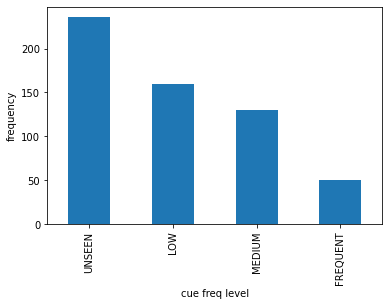

<AxesSubplot:ylabel='Frequency'>

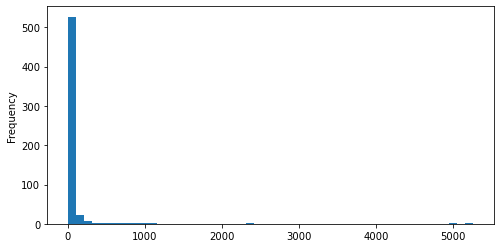

<AxesSubplot:ylabel='frequency'>

,relation,m(a)p10_sentence,m(a)p10_mask_dap
0,IsA,0.24748,0.372769


Micro mAP@10_sentence: 0.2474798831569665
Micro mAP@10_dap: 0.3727685460758376


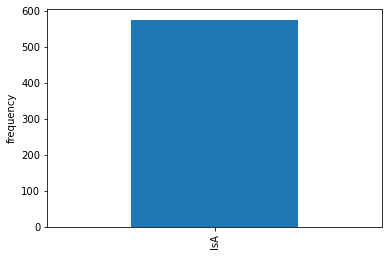

In [19]:


def bin_count(df, freq_col, dataset):
    cut_labels = ["LOW", "MEDIUM", "FREQUENT"] #, "VERYFREQUENT"]
    cut_bins = [0, 10, 100,  df[freq_col].max()] #5000,
    df['sub_freq_level'] = pd.cut(df[freq_col], bins=cut_bins, labels=cut_labels).values.add_categories("UNSEEN")
    df['sub_freq_level'].fillna(value='UNSEEN', inplace=True)
    
#     df[['sub_label', 'obj_label', freq_col, 'sub_freq_level']]
    display(df['sub_freq_level'].value_counts())
    sub_freq_level_to_num = Counter(df['sub_freq_level'])
    display(df['sub_freq_level'].value_counts().plot(kind='bar', xlabel='cue freq level', ylabel='frequency'))
    plt.show()
    display(df[freq_col].plot(kind='hist', bins=50, figsize=(8, 4), xlabel='cue count '))
    plt.show()
    display(df['relation'].value_counts().plot(kind='bar', ylabel='frequency'))
    data = []
    if dataset == 'LAMA': 
        metric_col_sentence = 'p10_mask_sentence'
        metric_col_dap = 'p10_mask_dap'
        
    else: 
        metric_col_sentence = 'ap10_def_sap'
        metric_col_dap = 'ap10_lsp_dap'
        
    for name, group in df.groupby(['relation']):
        data.append({"relation": name,
                     'm(a)p10_sentence': group[metric_col_sentence].mean(), 
                     'm(a)p10_mask_dap': group[metric_col_dap].mean()})
    df_res = pd.DataFrame(data)                                              
    display(df_res)
    print(f"Micro mAP@10_sentence: {df[metric_col_sentence].mean()}")
    print(f"Micro mAP@10_dap: {df[metric_col_dap].mean()}")
    return sub_freq_level_to_num 

#     print("Macro mAP@10_sentence: ",df_res['m(a)p10_mask_sentence'].mean())
#     print("Macro mAP@10_dap: ", df_res['m(a)p10_mask_dap''].mean())



# path_WNLaMPro = './am-for-bert/results/exp_data_results_anchor_type_coordinate_max_anchor_num_10_anchor_scorer_freqProbLogSum.WNLaMPro.csv'

path_WNLaMPro = 'exp_data_results_anchor_type_coordinate_concate_or_single_max_anchor_num_5_anchor_scorer_freqProbLogSum.WNLaMPro.csv'
# path_clsb = 

path = 'exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_5_anchor_scorer_probAvg.DIAGNOSTIC.csv'

# path = path_clsb
# path = path_lama 
# path = path_WNLaMPro
dataset = 'lm_diagnostic_extended'
output_dir = 'analysis_rare_words/output/'

# if 'CLSB' in path or 'LAMA' in path: 
print(path)
freq_col = 'FREQcount'
dataset = 'CLSB'
df = calculate_SUBTLEX_corr_freq_mAP(result_path=path, display_corr=False)

if 'LAMA' in path: 
    df = calculate_SUBTLEX_corr_freq_mAP(result_path=path, display_corr=False)
    freq_col = 'FREQcount'
    dataset = 'LAMA'
elif 'WNLaMPro' in path:
    df = pd.read_csv(path_WNLaMPro)
    freq_col = 'sub_count'
    dataset='WNLaMPro'
    
sub_freq_level_to_num = bin_count(df, freq_col, dataset)

## Analysis: freq group performance

,ap10_def_sap,ap10_def_dap,ap10_lsp_sap,ap10_lsp_dap,#instances
FREQUENT,33.4,42.0,42.4,49.0,50
MEDIUM,24.7,31.6,31.5,43.5,130
LOW,26.9,31.7,27.5,37.7,160
UNSEEN,21.5,26.9,19.8,31.1,236


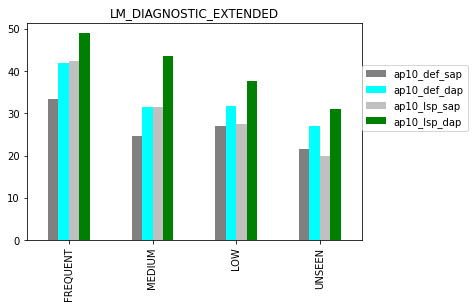

In [31]:
group_means = []
group_index = []
for name, group in df.groupby('sub_freq_level'):
    metrics = [ 'ap10_def_sap', 'ap10_def_dap', 'ap10_lsp_sap', 'ap10_lsp_dap']
#     metrics = [ 'p5_def_sap', 'p5_def_dap', 'p5_lsp_sap', 'p5_lsp_dap']
#     metrics = [ 'p10_def_sap', 'p10_def_dap', 'p10_lsp_sap', 'p10_lsp_dap']
    group_mean = group[metrics].mean().to_frame().round(decimals = 3)*100#'ap10_sentence', 'ap10_sentence_dap',
#     display(group_mean.T)
    group_means.append(group_mean.T)
    group_index.append(name)

group_means = pd.concat(group_means)
group_means.index = group_index 

new_index = ['FREQUENT', 'MEDIUM', 'LOW', 'UNSEEN']
group_means = group_means.reindex(new_index)

dataset = 'LM_DIAGNOSTIC_EXTENDED'
color = ['grey', 'aqua', 'silver', 'green']
group_means.plot(kind='bar', color= color) #, xticks=['FREQUENT', 'MEDIUM', 'LOW', 'UNSEEN'])
plt.legend(loc= (1,0.5))
plt.title(dataset)
plt.savefig('')

group_means['#instances'] = [sub_freq_level_to_num[x] for x in new_index]
display(group_means)


In [27]:
df.query("sub_freq_level=='LOW' and p5_lsp_sap==1")[['sub_label', 'obj_label', 'obj_mask_lsp_sap']]

,sub_label,obj_label,obj_mask_lsp_sap
0,graver,"['tool', 'tools']","['tool', 'stories', 'poems', 'things', 'books', 'digger', 'shovel', 'works', 'grave', 'tools']"
7,marigold,"['flower', 'flowers']","['poems', 'flowers', 'stories', 'flower', 'things', 'plant', 'plants', 'varieties', 'fruits', 'roses']"
16,puffin,"['bird', 'birds']","['birds', 'species', 'stories', 'bird', 'books', 'fish', 'poems', 'islands', 'types', 'breeds']"
17,penknife,"['tool', 'tools']","['weapon', 'tool', 'things', 'stories', 'tools', 'poems', 'examples', 'books', 'products', 'knife']"
21,tamp,"['tool', 'tools']","['yes', 'things', 'means', 'tool', 'tools', 'method', 'methods', 'tricks', 'yeah', 'terms']"
29,autogiro,"['vehicle', 'vehicles']","['cars', 'vehicles', 'automobile', 'vehicle', 'models', 'publications', 'companies', 'automobiles', 'brands', 'examples']"
31,parsonage,"['building', 'buildings']","['buildings', 'building', 'places', 'church', 'dwelling', 'things', 'house', 'farmhouse', 'structures', 'rectory']"
41,oxcart,"['vehicle', 'vehicles']","['stories', 'vehicle', 'poems', 'things', 'device', 'implement', 'wagon', 'horse', 'tales', 'cart']"
68,mayfly,"['insect', 'insects']","['insects', 'things', 'fly', 'insect', 'flies', 'species', 'beetles', 'birds', 'bug', 'butterfly']"
75,straightedge,"['tool', 'tools']","['tools', 'tool', 'things', 'games', 'yes', 'puzzles', 'sports', 'implements', 'tricks', 'implement']"


In [47]:


data = []
for name, group in df.groupby("sub_freq_level"):
    if 'LAMA' in path:
        data.append({"frequency_level": name, "P@10_sentence": group['p10_sentence'].mean(), "P@10_dap": group['p10_def_dap'].mean() })
    else:
        data.append({"frequency_level": name, "mAP@10_sentence": group['ap10_lsp_dap'].mean(), "mAP@10_dap": group['ap10_def_dap'].mean() })
df_data= pd.DataFrame(data)
# display(df_data)
# print("mAP@10_sentence: ",df_data['mAP@10_sentence'].mean())
# print("mAP@10_dap: ", df_data['mAP@10_dap'].mean())


data = []
for name, group_freq in df.groupby("sub_freq_level"):
    for rel, group in group_freq.groupby("relation"):
        if 'LAMA' in path:
            group_avg = group['p10_mask_sentence'].mean()
        else:
            group_avg = group['ap10_def_sap'].mean()
        data.append({"relation": rel, "frequency_level": name, "mAP@10": group_avg})
df_data_sentence= pd.DataFrame(data)
# display(df_data_sentence)


data = []
for name, group_freq in df.groupby("sub_freq_level"):
    for rel, group in group_freq.groupby("relation"):
        if 'LAMA' in path:
            group_avg = group['p10_mask_dap'].mean()
        else:
            group_avg = group['ap10_lsp_dap'].mean()
        data.append({"relation": rel, 
                     "frequency_level": name, 
                     "mAP@10": group_avg})
df_data_dap = pd.DataFrame(data)
# display(df_data_dap)

df_merge = pd.merge(df_data_sentence, df_data_dap, on=['relation', 'frequency_level'], suffixes=('_sentence', '_dap'))
# display(df_merge)

for name, group in  df_merge.groupby("relation"):
    display(group)

,relation,frequency_level,mAP@10_sentence,mAP@10_dap
0,IsA,LOW,0.269102,0.376631
1,IsA,MEDIUM,0.246749,0.435226
2,IsA,FREQUENT,0.333556,0.490103
3,IsA,UNSEEN,0.214987,0.310887


In [48]:
df.to_csv(f"analysis_rare_words/output/{dataset}.hypernym.csv")

In [51]:
df['gains' ] = df['ap10_lsp_dap'] - df['ap10_def_sap'] 
df_gained = df.query("gains>0")
df_dropped = df.query("gains<=0")

print(len(df_gained.index))
print(len(df_dropped.index))

# df[['sub_label', 'gains']].head()
# 'ap10_mask_sentence_dap', 'ap10_mask_sentence_dap'
# uncommon_word = ['aspargus', 'cymbal', 'fir', 'gherkin',  'goggles', 'sultana', 'woodpecker', 'bayonet']
# for name, group in df_gained.groupby("sub_label"):
#     display(group[['sub_label', 'obj_label', '']])

241
335


## When do anchors help? 

In [70]:
# display(df.query("sub_label == 'dog'")[['sub_label', 'obj_label', 'relation', 'obj_def_sap', 'obj_def_dap', 'obj_lsp_sap', 'obj_lsp_dap', 'subj_anchors', 'ap10_def_sap', 'ap10_lsp_dap', 'recall_10_mask_def_sap', 'recall_10_mask_def_dap'  ]])

df1 = df.query("sub_freq_level=='LOW' and ap10_def_sap==0 and ap10_def_dap>0") #or ap10_lsp_dap==1")
df1=df1[['sub_label', 'obj_label', 'subj_anchors', 'relation', 'ap10_def_sap', 'ap10_lsp_dap', 
         'sub_freq_level', 
         'obj_mask_def_sap', 'obj_mask_def_dap',
          'obj_mask_lsp_sap', 'obj_mask_lsp_dap',
        ]]
df1 = df1.sort_values(by="ap10_lsp_dap", ascending=False)

# df1 = df.query("sub_freq_level=='LOW' and ap10_def_sap==0 or ap10_lsp_dap==1")

# .query("sub_freq_level=='LOW'").query("ap10_def_sap==0 or ap10_lsp_dap==1")
df1.head(50)
# # df1[['sub_freq_level']].head()
# for name, group in df.query("ap10_def_sap==0 or ap10_lsp_dap==1")[['sub_label', 'obj_label', 'relation', 'ap10_def_sap', 'ap10_lsp_dap', 'sub_freq_level']].groupby("sub_label"):
# # #     if len(group.index)>=4:
#         display(group)
# for x in df['ap10_def_sap']: 
#     print(type(x))

,sub_label,obj_label,subj_anchors,relation,ap10_def_sap,ap10_lsp_dap,sub_freq_level,obj_mask_def_sap,obj_mask_def_dap,obj_mask_lsp_sap,obj_mask_lsp_dap
328,knockabout,"['vehicle', 'vehicles']","['cars', 'rope', 'poker', 'stuff', 'costume']",IsA,0.0,1.000000,LOW,"['accident', 'illusion', 'failure', 'emergency', 'mistake', 'act', 'example', 'event', 'innovation', 'invention']","['car', 'game', 'costume', 'automobile', 'vehicle', 'rope', 'exercise', 'gamble', 'event', 'illusion']","['things', 'yeah', 'cars', 'games', 'yes', 'stuff', 'okay', 'features', 'stories', 'examples']","['vehicles', 'means', 'games', 'boxing', 'things', 'stuff', 'cars', 'costume', 'wrestling', 'techniques']"
306,priory,"['building', 'buildings']","['abbey', 'monastery', 'church', 'convent', 'monasteries']",IsA,0.0,0.833333,LOW,"['example', 'exception', 'monastery', 'abbey', 'church', 'cathedral', 'parish', 'estate', 'diocese', 'convent']","['abbey', 'monastery', 'church', 'priory', 'house', 'convent', 'institution', 'building', 'establishment', 'settlement']","['building', 'places', 'buildings', 'monasteries', 'house', 'church', 'structures', 'abbey', 'things', 'churches']","['building', 'monasteries', 'buildings', 'names', 'things', 'establishment', 'churches', 'terms', 'institutions', 'structure']"
191,minibike,"['vehicle', 'vehicles']","['motorcycle', 'car', 'truck', 'bike', 'bicycle']",IsA,0.0,0.833333,LOW,"['automobile', 'bicycle', 'motorcycle', 'bike', 'atv', 'example', 'accessory', 'airplane', 'aircraft', 'object']","['bicycle', 'automobile', 'motorcycle', 'example', 'vehicle', 'atv', 'accessory', 'alternative', 'bike', 'suv']","['vehicle', 'accessories', 'motorcycle', 'bicycle', 'vehicles', 'toys', 'things', 'car', 'motorcycles', 'bike']","['vehicles', 'things', 'vehicle', 'bicycle', 'motorcycles', 'bicycles', 'motorcycle', 'accessories', 'automobile', 'car']"
286,aviary,"['building', 'buildings']","['zoo', 'greenhouse', 'nursery', 'library', 'barn']",IsA,0.0,0.750000,LOW,"['zoo', 'aquarium', 'enclosure', 'garden', 'arboretum', 'environment', 'habitat', 'animal', 'ecosystem', 'area']","['enclosure', 'library', 'zoo', 'aquarium', 'building', 'garden', 'greenhouse', 'nursery', 'museum', 'animal']","['areas', 'zoo', 'wildlife', 'things', 'facilities', 'places', 'hunting', 'buildings', 'birds', 'animals']","['buildings', 'zoo', 'things', 'building', 'facilities', 'facility', 'gardens', 'animal', 'areas', 'farm']"
245,gatehouse,"['building', 'buildings']","['castle', 'tower', 'fortress', 'ruins', 'gate']",IsA,0.0,0.750000,LOW,"['example', 'exception', 'gate', 'castle', 'fortress', 'fortification', 'stronghold', 'gateway', 'moat', 'fort']","['enclosure', 'example', 'building', 'fortification', 'gate', 'castle', 'exception', 'structure', 'wall', 'entrance']","['structure', 'buildings', 'structures', 'building', 'things', 'gate', 'places', 'castle', 'features', 'gates']","['building', 'structures', 'structure', 'buildings', 'terms', 'castle', 'things', 'names', 'gate', 'ruins']"
118,toboggan,"['vehicle', 'vehicles']","['bicycle', 'bike', 'boat', 'motorcycle', 'bicycles']",IsA,0.0,0.642857,LOW,"['example', 'object', 'bicycle', 'umbrella', 'wheel', 'glider', 'obstacle', 'alternative', 'wheelchair', 'exercise']","['example', 'bicycle', 'alternative', 'boat', 'automobile', 'object', 'wheel', 'atv', 'wheelchair', 'vehicle']","['sports', 'games', 'things', 'equipment', 'device', 'activities', 'walking', 'sport', 'hiking', 'cycling']","['vehicle', 'things', 'boat', 'sports', 'equipment', 'games', 'vehicles', 'transportation', 'craft', 'device']"
67,rammer,"['tool', 'tools']","['punch', 'jack', 'rake', 'bar', 'trick']",IsA,0.0,0.625000,LOW,"['actor', 'liar', 'idiot', 'adjective', 'entertainer', 'joke', 'illusion', 'artist', 'entrepreneur', 'person']","['trick', 'bar', 'illusion', 'explosive', 'punch', 'implement', 'rake', 'explosion', 'tool', 'archer']","['stories', 'poems', 'yes', 'things', 'films', 'shows', 'oh', 'cartoons', 'works', 'tales']","['tool', 'punch',

In [ ]:
df['']

In [60]:
display(df.query("sub_label == 'spanner'")[['sub_label', 'obj_label', 'relation', 'obj_def_sap', 'obj_def_dap', 'obj_lsp_sap', 'obj_lsp_dap', 'subj_anchors']])

display(df.query("sub_label == 'gherkin'")[['sub_label', 'obj_label', 'relation', 'obj_def_sap', 'obj_def_dap', 'obj_lsp_sap', 'obj_lsp_dap', 'subj_anchors']])

#                                       'ap10_lsp_dap','ap10_mask_dap', 'ap10_mask_sap']]

,sub_label,obj_label,relation,obj_mask_def_sap,obj_mask_def_dap,obj_mask_lsp_sap,obj_mask_lsp_dap,subj_anchors
421,spanner,"['tool', 'lever', 'tools', 'levers']",IsA,"['instrument', 'tool', 'object', 'device', 'artifact', 'automobile', 'example', 'illusion', 'umbrella', 'axe']","['tool', 'object', 'drill', 'instrument', 'stick', 'hammer', 'blade', 'axe', 'implement', 'hook']","['tool', 'device', 'instrument', 'terms', 'things', 'devices', 'instruments', 'tools', 'equipment', 'toys']","['tool', 'tools', 'devices', 'training', 'equipment', 'device', 'weapons', 'instruments', 'things', 'instrument']","['hammer', 'drill', 'hook', 'stick', 'blade']"


,sub_label,obj_label,relation,obj_mask_def_sap,obj_mask_def_dap,obj_mask_lsp_sap,obj_mask_lsp_dap,subj_anchors
196,gherkin,"['vegetable', 'cucumber', 'fruit', 'vegetables', 'cucumbers', 'fruits']",IsA,"['instrument', 'accordion', 'animal', 'owl', 'object', 'umbrella', 'elephant', 'noun', 'arrow', 'organ']","['cheese', 'grape', 'apple', 'ingredient', 'cherry', 'wine', 'vine', 'herb', 'plant', 'fruit']","['things', 'foods', 'yes', 'terms', 'words', 'people', 'items', 'stuff', 'term', 'drugs']","['spices', 'fruit', 'herbs', 'foods', 'stuff', 'fruits', 'substances', 'things', 'ingredients', 'milk']","['garlic', 'grape', 'cherry', 'cheese', 'herbs']"


In [249]:
# word_to_freq = dict(zip(df['sub_label'], df[freq_col]))
rare_sub = list(set(df.query(f"sub_freq_level == 'LOW'")['sub_label']))
print(f"#{len(rare_sub)} rare_sub: {rare_sub}")

rare_sub_gains = list(set(df.query(f"sub_freq_level == 'LOW' and gains>0")['sub_label']))
freq_sub_gains = list(set(df.query(f"sub_freq_level == 'FREQUENT' and gains<0")['sub_label']))
print(f"#Rare: {len(rare_sub_gains)}", rare_sub_gains)
print()
print(f"#Frequent: {len(freq_sub_gains)}", freq_sub_gains)

#24 rare_sub: ['budgie', 'platypus', 'wetsuit', 'courgette', 'scallop', 'currant', 'grater', 'penknife', 'colander', 'sultana', 'spanner', 'geranium', 'daffodil', 'encyclopaedia', 'satsuma', 'housefly', 'marigold', 'nectarine', 'gherkin', 'ladybird', 'kingfisher', 'seahorse', 'crayfish', 'cockerel']
#Rare: 24 ['budgie', 'platypus', 'wetsuit', 'courgette', 'scallop', 'currant', 'grater', 'penknife', 'colander', 'sultana', 'spanner', 'geranium', 'daffodil', 'encyclopaedia', 'satsuma', 'housefly', 'marigold', 'nectarine', 'gherkin', 'ladybird', 'kingfisher', 'seahorse', 'crayfish', 'cockerel']

#Frequent: 349 ['bicycle', 'spade', 'tea', 'toaster', 'bullet', 'doll', 'garlic', 'bottle', 'turkey', 'calf', 'rifle', 'hamster', 'rope', 'cigarette', 'tongue', 'cradle', 'bear', 'stove', 'bell', 'swimsuit', 'camera', 'anchor', 'starling', 'arm', 'toilet', 'whisky', 'bridge', 'rhino', 'squirrel', 'grapefruit', 'puppet', 'arrow', 'van', 'tyre', 'fox', 'coffin', 'stick', 'tomato', 'gown', 'cheetah', 

In [138]:
df.head(1)

,Unnamed: 0,uuid,masked_sentences,obj_label,relation,feature_type,sub_label,sub_position,masked_sap,masked_anchor_prompts,masked_double_anchor_prompts,obj_mask_incontext,obj_mask_incontext_score,obj_mask_sap,obj_mask_sap_score,subj_anchors,subj_anchors_score,masked_sentences_with_subj_anchor,subj_anchors_combined,obj_mask_dap,obj_mask_dap_score,obj_mask_sap_dap,obj_mask_incontext_dap,p@1_mask_incontext,p@10_mask_incontext,p@1_mask_sap,p@10_mask_sap,p@1_mask_dap,p@10_mask_dap,p@1_mask_sap_dap,p@10_mask_sap_dap,p@1_mask_incontext_dap,p@10_mask_incontext_dap,mrr_mask_sap,mrr_mask_dap,mrr_mask_incontext,mrr_mask_incontext_dap,mrr_mask_sap_dap,ap1_mask_incontext,ap10_mask_incontext,ap1_mask_sap,ap10_mask_sap,ap1_mask_dap,ap10_mask_dap,ap1_mask_sap_dap,ap10_mask_sap_dap,ap1_mask_incontext_dap,ap10_mask_incontext_dap,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,All_freqs_SUBTLEX,sub_freq_level,gains
0,0,0,['Everyone knows that an accordion has <mask>.'],"['keys', 'buttons', 'handles', 'straps']",Has,"['visual perceptual', 'visual perceptual', 'visual perceptual', 'visual perceptual']",accordion,23,"Usually, we would expect accordion to have <mask> .","['such as accordion and <mask> .', 'such as accordion or <mask> .', ', such as accordion and <mask> .', 'as accordion and <mask> .', 'as accordion or <mask> .', ', such as accordion and <mask> .', ', such as accordion or <mask> .', 'accordion, <mask> or other ', 'accordion, <mask> and other ', ', including accordion and <mask> ', ', including accordion or <mask> ', ', especially accordion and <mask> ', ', especially accordion or <mask> ']","['<mask> such as accordion and [Z] ,', '<mask> such as accordion or [Z] ,', 'such <mask> as accordion and [Z] ,', 'such <mask> as accordion or [Z] ,', 'accordion, [Z] or other <mask> ', 'accordion, [Z] and other <mask> ', '<mask>, including accordion and [Z] ', '<mask>, including accordion or [Z] ', '<mask>, especially accordion and [Z] ', '<mask>, especially accordion or [Z] ']","['strings', 'pedals', 'keys', 'horns', 'bells', 'notes', 'wings', 'chords', 'sound', 'holes']","{'strings': 0.4057776927947998, 'pedals': 0.05027397722005844, 'keys': 0.04464489221572876, 'horns': 0.02894490212202072, 'bells': 0.02892514318227768, 'notes': 0.02517617866396904, 'wings': 0.023598559200763702, 'chords': 0.019234152510762215, 'sound': 0.018166400492191315, 'holes': 0.014821668155491352}",['strings'],{'strings': 0.014949753880500793},"['guitar', 'piano', 'violin', 'keyboard', 'organ', 'recorder', 'trumpet', 'keyboards', 'percussion', 'whistle']","{'guitar': -6.733606610148871, 'piano': -6.971401481909592, 'violin': -7.272116694163713, 'keyboard': -7.881403563002974, 'organ': -8.335647043758136, 'recorder': -8.464742694687564, 'trumpet': -8.511778253776082, 'keyboards': -8.583267003902094, 'percussion': -9.547109535152254, 'whistle': -9.691231244493387}","['Everyone knows that an accordion has <mask>.', 'Everyone knows that an accordion or guitar has <mask>.', 'Everyone knows that an accordion or piano has <mask>.', 'Everyone knows that an accordion or violin has <mask>.', 'Everyone knows that an accordion or keyboard has <mask>.', 'Everyone knows that an accordion or organ has <mask>.', 'Everyone knows that an accordion or recorder has <mask>.', 'Everyone knows that an accordion or trumpet has <mask>.', 'Everyone knows that an accordion or keyboards has <mask>.', 'Everyone knows that an accordion or percussion has <mask>.', 'Everyone knows that an accordion or whistle has <mask>.']",accordion guitar piano violin keyboard organ recorder trumpet keyboards percussion whistle,"['strings', 'keys', 'pedals', 'notes', 'bells', 'sound', 'music', 'wings', 'chords', 'drums']","{'strings': -1.6594811362466841, 'keys': -3.9792004514379684, 'pedals': -4.321941799236625, 'notes': -4.875540686157276, 'bells': -5.008256216809622, 'sound': -5.302652576289231, 'music': -5.371452560917179, 'wings': -5.405157410584509, 'chords': -5.441108006807682, 'drums': -5.4986

In [168]:
# uncommon_words = ['aspargus', 'cymbal', 'fir', 'gherkin',  'goggles', 'sultana', 'woodpecker', 'bayonet']

# df_case = df.query(f"sub_label in {rare_sub_gains} and gains>0")[['sub_label', 'obj_label', 'masked_sentences', 'obj_sentence', 'obj_dap', 'subj_anchors', freq_col, 'gains']].sort_values('gains', ascending=False)
# df_case.to_excel("rare_words_case_study.WNLaProLM.xlsx")
# for i, (name, group) in enumerate(df_case.groupby('sub_label')):
#     display(group)
#     if i>10:
#         break 


df_case = df.query(f"sub_label in {rare_sub_gains} and gains<0")[['sub_label', 'obj_label', 'masked_sentences', 'obj_sentence', 'obj_dap', 'subj_anchors', freq_col, 'gains']].sort_values('gains', ascending=False)
# df_case.to_excel("rare_words_case_study.WNLaProLM.xlsx")
for i, (name, group) in enumerate(df_case.groupby('sub_label')):
    display(group)
#     if i>10:
#         break 



### Inspect rare words (improved) 

In [53]:
df_rare = df.query("sub_freq_level == 'LOW' and gains >0")

df_rare[['sub_label', 'obj_label', 'masked_sentences', 'obj_sentence', 'obj_dap', 'subj_anchors', freq_col, 'gains']].sort_values('gains', ascending=True).head(20)


KeyError: "['obj_sentence', 'obj_dap'] not in index"

### Inspect rare words (failed) 

In [221]:
df_rare_failed = df.query("sub_freq_level == 'LOW' and gains <0")

df_rare_failed[['sub_label', 'obj_label', 'masked_sentences', 'obj_sentence', 'obj_dap', 'subj_anchors', freq_col, 'gains']].sort_values('gains', ascending=True).head(20)

df_rare_failed['inter_sub_subanchors'] = df[['obj_label', 'subj_anchors']].apply(lambda x: set(eval(x[0])).intersection(set(eval(x[1]))), axis=1)
df_rare_failed['inter_count_sub_subanchors'] = df_rare_failed['inter_sub_subanchors'].apply(lambda x: len(x))


df_rare_failed['inter_obj_sentence'] = df[['obj_label', 'obj_sentence']].apply(lambda x: set(eval(x[0])).intersection(set(eval(x[1]))), axis=1)
df_rare_failed['inter_count_obj_sentence'] = df_rare_failed['inter_obj_sentence'].apply(lambda x: len(x))

df_rare_failed['inter_obj_dap'] = df[['obj_label', 'obj_dap']].apply(lambda x: set(eval(x[0])).intersection(set(eval(x[1]))), axis=1)
df_rare_failed['inter_count_obj_dap'] = df_rare_failed['inter_obj_dap'].apply(lambda x: len(x))



display(df_rare_failed[['inter_count_sub_subanchors']].value_counts())

display(df_rare_failed[[ 'inter_count_obj_sentence']].value_counts())

display(df_rare_failed[['inter_count_obj_dap' ]].value_counts())


<ipython-input-221-625472e59caa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rare_failed['inter_sub_subanchors'] = df[['obj_label', 'subj_anchors']].apply(lambda x: set(eval(x[0])).intersection(set(eval(x[1]))), axis=1)
<ipython-input-221-625472e59caa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rare_failed['inter_count_sub_subanchors'] = df_rare_failed['inter_sub_subanchors'].apply(lambda x: len(x))
<ipython-input-221-625472e59caa>:9: SettingWithCopyWarning: 
A value is trying to be set on 

inter_count_sub_subanchors
0                             114
1                              99
2                              28
3                               7
dtype: int64

inter_count_obj_incontext
1                            149
2                             64
3                             29
4                              5
5                              1
dtype: int64

inter_count_obj_dap
0                      131
1                       77
2                       36
3                        4
dtype: int64

In [232]:


print("Inspect failed instances whose obj_labels occurred in subj_anchors")
display(df_rare_failed.query("inter_count_sub_subanchors==1")[['sub_label', 'obj_label', 'inter_count_sub_subanchors', 'subj_anchors']].head(40))

# print("Inspect failed instances whose obj_labels not occurred in subj_anchors")
# df_rare_failed_dap = df_rare_failed.query("inter_count_sub_subanchors==0 and inter_count_obj_sentence==1 and inter_count_obj_dap==0 ")[['sub_label', 'obj_label', 'obj_sentence', 'obj_dap', 'subj_anchors']]
# display(df_rare_failed_dap.sample(40))

# df_rare_failed['inter_count'] 
# count_error_type1 = 0 
# for item in df_rare_failed.itertuples():
#     print(item.sub_label)
#     obj = set(eval(item.obj_label))
#     subj_anchors = set(eval(item.subj_anchors))
# #     print(obj,subj_anchors)
#     inter = set(obj).intersection(set(subj_anchors))
#     if len(inter)>0:
#         print("{}\t{}\t{}".format(inter, obj, subj_anchors ))
  
    
# # [['obj_label', 'subj_anchors']].to_dict(orient='records'):
# #     obj = set(eval(item['obj_label']))
# #     subj_anchors = set(eval(item['subj_anchors']))
# # #     print(obj,subj_anchors)
# #     inter = set(obj).intersection(set(subj_anchors))
# #     if len(inter)>0:
# #         print("{}\t{}\t{}".format(inter, obj, subj_anchors ))
#         count_error_type1 +=1
    
# print(count_error_type1)
print(len(df_rare_failed_dap.index))


Inspect failed instances whose obj_labels occurred in subj_anchors


,sub_label,obj_label,inter_count_sub_subanchors,subj_anchors
6487,tenterhook,"['mechanism', 'hook', 'claw']",1,"['hook', 'pin', 'compass', 'string', 'needle', 'scissors', 'hammer', 'hooks', 'loop', 'similar']"
6496,battle-ax,"['wife', 'axe', 'ax']",1,"['sword', 'hammer', 'dagger', 'swords', 'similar', 'axe', 'spears', 'revolver', 'rifle', 'pistol']"
6502,terrorization,"['behavior', 'behaviour', 'aggression', 'bullying', 'misconduct', 'intimidation']",1,"['intimidation', 'violence', 'terrorism', 'torture', 'coercion', 'kidnapping', 'exploitation', 'persecution', 'war', 'extortion']"
6519,rathole,"['area', 'room', 'hole']",1,"['carp', 'sponge', 'algae', 'hole', 'cabbage', 'tunnel', 'holes', 'root', 'kidney', 'bowl']"
6566,idolisation,"['approval', 'worship', 'appreciation', 'blessing', 'admiration']",1,"['imitation', 'exploitation', 'worship', 'obsession', 'propaganda', 'sexism', 'bullying', 'racism', 'manipulation', 'cult']"
6603,phlebectomy,"['process', 'operation', 'procedure', 'surgery']",1,"['surgery', 'chemotherapy', 'circumcision', 'radiation', 'ultrasound', 'anesthesia', 'transplant', 'removal', 'graft', 'freezing']"
6610,monoplegia,"['dysfunction', 'paralysis', 'pathology']",1,"['depression', 'coma', 'epilepsy', 'paralysis', 'seizures', 'hysteria', 'hallucinations', 'hypertension', 'delusion', 'diabetes']"
6612,concomitance,"['timing', 'conjunction', 'coincidence']",1,"['coincidence', 'symmetry', 'marriage', 'correlation', 'competition', 'overlap', 'proximity', 'inheritance', 'partnership', 'convergence']"
6616,somberness,"['fear', 'dread', 'fright', 'melancholy', 'apprehension']",1,"['melancholy', 'sadness', 'depression', 'loneliness', 'silence', 'anxiety', 'fatigue', 'gloom', 'uncertainty', 'exhaustion']"
6627,privateersman,"['officer', 'sailor', 'tar', 'seaman']",1,"['sailor', 'destroyer', 'pirate', 'captain', 'explorer', 'private', 'trader', 'merchant', 'mercenary', 'marine']"


42


In [333]:
# path = 'exp_data_results_anchor_type_coordinate_max_anchor_num_10_anchor_scorer_freqProbLogSum.csv'
# df = pd.read_csv(path)
# print(df.columns)
# df.head(1)
df = calculate_SUBTLEX_corr_freq_mAP(display_corr=False)
display(df.columns)
display(df.head(1))

Index(['Unnamed: 0', 'sub_label', 'obj_label', 'masked_sentences', 'uuid',
       'sub_position', 'masked_sap', 'masked_anchor_prompts',
       'masked_double_anchor_prompts', 'obj_mask_incontext',
       'obj_mask_incontext_score', 'obj_mask_sap', 'obj_mask_sap_score',
       'subj_anchors', 'subj_anchors_score',
       'masked_sentences_with_subj_anchor', 'subj_anchors_combined',
       'obj_mask_dap', 'obj_mask_dap_score', 'obj_mask_sap_dap',
       'obj_mask_incontext_dap', 'p1_mask_incontext', 'p10_mask_incontext',
       'p1_mask_sap', 'p10_mask_sap', 'p1_mask_dap', 'p10_mask_dap',
       'p1_mask_sap_dap', 'p10_mask_sap_dap', 'p1_mask_incontext_dap',
       'p10_mask_incontext_dap', 'mrr_mask_incontext', 'mrr_mask_sap',
       'mrr_mask_dap', 'mrr_mask_sap_dap', 'mrr_mask_incontext_dap',
       'ap1_mask_incontext', 'ap10_mask_incontext', 'ap1_mask_sap',
       'ap10_mask_sap', 'ap1_mask_dap', 'ap10_mask_dap', 'ap1_mask_sap_dap',
       'ap10_mask_sap_dap', 'ap1_mask_incontext_d

,Unnamed: 0,sub_label,obj_label,masked_sentences,uuid,sub_position,masked_sap,masked_anchor_prompts,masked_double_anchor_prompts,obj_mask_incontext,obj_mask_incontext_score,obj_mask_sap,obj_mask_sap_score,subj_anchors,subj_anchors_score,masked_sentences_with_subj_anchor,subj_anchors_combined,obj_mask_dap,obj_mask_dap_score,obj_mask_sap_dap,obj_mask_incontext_dap,p1_mask_incontext,p10_mask_incontext,p1_mask_sap,p10_mask_sap,p1_mask_dap,p10_mask_dap,p1_mask_sap_dap,p10_mask_sap_dap,p1_mask_incontext_dap,p10_mask_incontext_dap,mrr_mask_incontext,mrr_mask_sap,mrr_mask_dap,mrr_mask_sap_dap,mrr_mask_incontext_dap,ap1_mask_incontext,ap10_mask_incontext,ap1_mask_sap,ap10_mask_sap,ap1_mask_dap,ap10_mask_dap,ap1_mask_sap_dap,ap10_mask_sap_dap,ap1_mask_incontext_dap,ap10_mask_incontext_dap,relation,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD,All_freqs_SUBTLEX
0,0,abdomen,['organs'],['The abdomen contains <mask>.'],0,4,"Usually, we would expect abdomen to have <mask> .","['such as abdomen and <mask> .', 'such as abdomen or <mask> .', ', such as abdomen and <mask> .', 'as abdomen and <mask> .', 'as abdomen or <mask> .', ', such as abdomen and <mask> .', ', such as abdomen or <mask> .', 'abdomen, <mask> or other ', 'abdomen, <mask> and other ', ', including abdomen and <mask> ', ', including abdomen or <mask> ', ', especially abdomen and <mask> ', ', especially abdomen or <mask> ']","['<mask> such as abdomen and [Z] ,', '<mask> such as abdomen or [Z] ,', 'such <mask> as abdomen and [Z] ,', 'such <mask> as abdomen or [Z] ,', 'abdomen, [Z] or other <mask> ', 'abdomen, [Z] and other <mask> ', '<mask>, including abdomen and [Z] ', '<mask>, including abdomen or [Z] ', '<mask>, especially abdomen and [Z] ', '<mask>, especially abdomen or [Z] ']","['sperm', 'eggs', 'seeds', 'organs', 'cells', 'hair', 'tissues', 'bacteria', 'neurons', 'blood']","{'sperm': 0.13454875349998474, 'eggs': 0.06575668603181839, 'seeds': 0.04432717710733414, 'organs': 0.04023859649896622, 'cells': 0.03890133276581764, 'hair': 0.031095638871192932, 'tissues': 0.030649887397885323, 'bacteria': 0.02857733704149723, 'neurons': 0.020722301676869392, 'blood': 0.02014751359820366}",['MISSING'],{'MISSING': 0},"['genitals', 'thighs', 'legs', 'liver', 'chest', 'groin', 'buttocks', 'vagina', 'bladder', 'stomach']","{'genitals': -7.403290931567249, 'thighs': -7.980303876205895, 'legs': -8.044012900462263, 'liver': -8.091010688602207, 'chest': -8.240106569480332, 'groin': -8.504488906310225, 'buttocks': -8.85848282289739, 'vagina': -8.935044345409962, 'bladder': -9.294071680503171, 'stomach': -9.639986856472447}","['The abdomen contains <mask>.', 'The abdomen or genitals contains <mask>.', 'The abdomen or thighs contains <mask>.', 'The abdomen or legs contains <mask>.', 'The abdomen or liver contains <mask>.', 'The abdomen or chest contains <mask>.', 'The abdomen or groin contains <mask>.', 'The abdomen or buttocks contains <mask>.', 'The abdomen or vagina contains <mask>.', 'The abdomen or bladder contains <mask>.', 'The abdomen or stomach contains <mask>.']",abdomen genitals thighs legs liver chest groin buttocks vagina bladder stomach,"['organs', 'food', 'sperm', 'cholesterol', 'urine', 'blood', 'tissues', 'fat', 'glands', 'cells']","{'organs': -3.0837518649130957, 'food': -3.758580091678821, 'sperm': -3.7751310198909493, 'cholesterol': -3.9584073507240864, 'urine': -4.116408711631266, 'blood': -4.18992488209298, 'tissues': -4.20812015154668, 'fat': -4.238844408074642, 'glands': -4.425963933798191, 'cells': -4.463617162384067}","['MISSING', 'organs', 'food', 'sperm', 'cholesterol', 'urine', 'blood', 'tissues', 'fat', 'glands']","['eggs', 'seeds', 'hair', 'bacteria', 'neurons', 'organs', 'sperm', 'food', 'cholesterol', 'urine']",0,1,0,0,1,1,0,1,0,1,0.25,0.0,1.0,0.5,0.166667,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.5,0.0,0.166667,HasA,171,122,152,116,3.35,2.2355,1.45,2.0899,171


In [341]:
df_hasa_hit = df.query("relation == 'HasA' and ap10_mask_sentence>0") #['FREQcount']
# .plot(kind='hist', bins=50)
print(len(df_hasa_hit.index), len(df.index))
print(len(df.query("relation == 'HasA'").index))

df_hasa_hit['gains' ] = df_hasa_hit['ap10_lsp_dap'] - df_hasa_hit['ap10_lsp_dap']
print(df_hasa_hit[['FREQcount','gains']].corr())
display(df_hasa_hit['gains' ].describe())

display(df_hasa_hit[['sub_label', 'obj_label', 'subj_anchors', 'p@10_mask_sentence', 'p@10_mask_dap', 'FREQcount']].sort_values(by=['FREQcount']).head(50))

# .plot(hist)

265 2206
623
           FREQcount  gains
FREQcount        1.0    NaN
gains            NaN    NaN


<ipython-input-341-ab8ba7f1b9b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasa_hit['gains' ] = df_hasa_hit['ap10_mask_incontext'] - df_hasa_hit['ap10_mask_incontext']


count    265.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: gains, dtype: float64

KeyError: "['p@10_mask_incontext', 'p@10_mask_dap'] not in index"

In [348]:
df_hasa_miss = df.query("relation == 'HasA' and ap10_mask_sentence==0")[['sub_label', 'obj_label', 'obj_sentence', 'masked_sentences', 'obj_dap']]
df_hasa_miss.sample(50)

,sub_label,obj_label,obj_mask_incontext,masked_sentences,obj_mask_dap
284,dogs,['claws'],"['feelings', 'personalities', 'ears', 'emotions', 'eyes', 'names', 'manners', 'teeth', 'souls', 'opinions']",['Dogs have <mask>.'],"['tails', 'feelings', 'allergies', 'sex', 'asthma', 'pets', 'eyes', 'ears', 'seizures', 'autism']"
256,continents,['beaches'],"['changed', 'ended', 'moved', 'added', 'names', 'borders', 'closed', 'shifted', 'rotated', 'expanded']",['Continents have <mask>.'],"['changed', 'meaning', 'rings', 'appeared', 'boundaries', 'names', 'moons', 'meanings', 'borders', 'vanished']"
3,acorn,['seeds'],"['fallen', 'landed', 'arrived', 'appeared', 'dropped', 'come', 'spoken', 'grown', 'died', 'sprung']",['An acorn has <mask>.'],"['fallen', 'seeds', 'seed', 'kernels', 'nuts', 'pollen', 'exploded', 'teeth', 'juice', 'apples']"
563,music,['information'],"['conversation', 'talking', 'entertainment', 'sports', 'exercise', 'conversations', 'thinking', 'talk', 'relaxing', 'dancing']","['The statement ""listening to the radio is for hearing music or news, or for <mask>."" helps answer the question ""Let\'s sit down in front of the radio, okay?"".']","['conversation', 'talking', 'entertainment', 'conversations', 'thinking', 'exercise', 'talk', 'dancing', 'discussion', 'relaxing']"
215,checkbook,['checks'],"['help', 'money', 'cash', 'deductions', 'receipts', 'deduction', 'withdrawal', 'assistance', 'funds', 'ease']","['With <mask> from your checkbook, one can get money from her bank account.']","['help', 'money', 'receipts', 'writing', 'assistance', 'details', 'input', 'entries', 'reminders', 'deductions']"
369,frogs,['knees'],"['feelings', 'eyes', 'legs', 'names', 'teeth', 'brains', 'ears', 'wings', 'evolved', 'tails']",['Frogs have <mask>.'],"['eyes', 'tails', 'eggs', 'feelings', 'wings', 'legs', 'scales', 'names', 'horns', 'teeth']"
327,everyone,['parents'],"['secrets', 'problems', 'dreams', 'opinions', 'stories', 'baggage']",['Everyone has <mask>.'],"['employees', 'access', 'stories', 'secrets', 'rituals', 'problems', 'changed', 'faith', 'baggage', 'opinions']"
298,ducks,['bills'],"['changed', 'history', 'won', 'responded', 'fun', 'issues', 'options', 'lost', 'arrived']",['Ducks have <mask>.'],"['eyes', 'changed', 'horns', 'feathers', 'tails', 'eggs', 'wings', 'legs', 'history', 'won']"
427,houses,['foundation'],"['purpose', 'story', 'basement', 'roof', 'history', 'price', 'view', 'ceiling', 'character', 'theme']",['Houses have a <mask>.'],"['basement', 'roof', 'barn', 'balcony', 'fireplace', 'garden', 'purpose', 'graveyard', 'garage', 'story']"
55,bananas,['potassium'],"['teeth', 'flavor', 'legs', 'guts', 'ears', 'taste', 'problems', 'value', 'eyes', 'roots']",['Bananas have <mask>.'],"['seeds', 'antioxidants', 'pits', 'sugar', 'protein', 'fiber', 'flavor', 'skin', 'fructose', 'pulp']"


## Error analysis on WNLaMPro

Index(['Unnamed: 0', 'sub_label', 'obj_label', 'masked_sentences', 'sub_freq',
       'sub_count', 'sub_pos', 'obj_label_extra', 'uuid', 'sub_position',
       'masked_sap', 'masked_anchor_prompts', 'masked_double_anchor_prompts',
       'obj_mask_incontext', 'obj_mask_incontext_score', 'obj_mask_sap',
       'obj_mask_sap_score', 'subj_anchors', 'subj_anchors_score',
       'masked_sentences_with_subj_anchor', 'subj_anchors_combined',
       'obj_mask_dap', 'obj_mask_dap_score', 'obj_mask_sap_dap',
       'obj_mask_incontext_dap', 'p1_mask_incontext', 'p10_mask_incontext',
       'p1_mask_sap', 'p10_mask_sap', 'p1_mask_dap', 'p10_mask_dap',
       'p1_mask_sap_dap', 'p10_mask_sap_dap', 'p1_mask_incontext_dap',
       'p10_mask_incontext_dap', 'mrr_mask_incontext', 'mrr_mask_sap',
       'mrr_mask_dap', 'mrr_mask_sap_dap', 'mrr_mask_incontext_dap',
       'ap1_mask_incontext', 'ap10_mask_incontext', 'ap1_mask_sap',
       'ap10_mask_sap', 'ap1_mask_dap', 'ap10_mask_dap', 'ap1_mask_sap_

<AxesSubplot:ylabel='Frequency'>

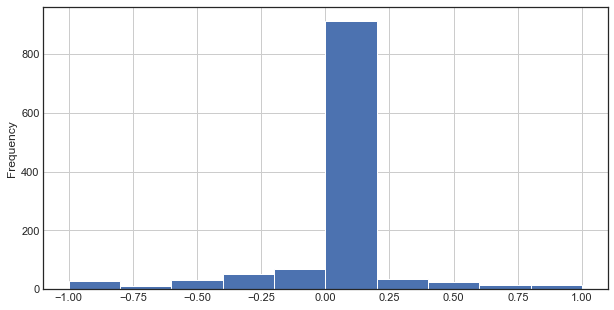

In [307]:

df = pd.read_csv(path)
# df.head()
print(df.columns)
df[['sub_label', 'obj_label', 'subj_anchors', 'obj_sentence', 'obj_dap', 'ap10_lsp_dap', 'ap10_mask_dap']]
df['gains'] = df[['ap10_mask_dap', 'ap10_lsp_dap']].apply(lambda x: x[0] - x[1], axis=1)
# df.head(1)
print(df['ap10_mask_dap'].mean())
print(df['ap10_lsp_dap'].mean())
df['gains'].plot(kind='hist', figsize=(8,4))

In [324]:

import numpy as np




################### mAP #####################
#reference
# 1. https://www.kaggle.com/code/debarshichanda/understanding-mean-average-precision/notebook (main)
# 2. https://towardsdatascience.com/breaking-down-mean-average-precision-map-ae462f623a52#f9ce

def rel_at_k(y_true, y_pred, k=10):
    """ Computes Relevance at k for one sample
    
    Parameters
    __________
    y_true: np.array
            Array of correct recommendations (Order doesn't matter)
    y_pred: np.array
            Array of predicted recommendations (Order does matter)
    k: int, optional
       Maximum number of predicted recommendations
            
    Returns
    _______
    score: double
           Relevance at k
    """
#     print(f"y_pred:{y_pred}")
#     print(f"y_true:{y_true}")

    if y_pred[k-1] in y_true:
        return 1
    else:
        return 0

def precision_at_k(y_true, y_pred, k=10):
    """ Computes Precision at k for one sample
    
    Parameters
    __________
    y_true: np.array
            Array of correct recommendations (Order doesn't matter)
    y_pred: np.array
            Array of predicted recommendations (Order does matter)
    k: int, optional
       Maximum number of predicted recommendations
            
    Returns
    _______
    score: double
           Precision at k
    """
#     intersection = np.intersect1d(y_true, y_pred[:k])
#     if len(y_pred)==0 or len(y_true)==0:
        # return 0
    intersection = set(y_true).intersection(set(y_pred[:k]))
    return len(intersection) / k

def average_precision_at_k(y_true, y_pred, k=10):
    """ Computes Average Precision at k for one sample
    
    Parameters
    __________
    y_true: np.array
            Array of correct recommendations (Order doesn't matter)
    y_pred: np.array
            Array of predicted recommendations (Order does matter)
    k: int, optional
       Maximum number of predicted recommendations
            
    Returns
    _______
    score: double
           Average Precision at k
    """
    ap = 0.0
    indicators = []
#     for i in range(1, k+1):
        # https://stackoverflow.com/questions/46374405/precision-at-k-when-fewer-than-k-documents-are-retrieved
        # Precision measured at various doc level cutoffs in the ranking.
        #If the cutoff is larger than the number of docs retrieved, then
        #it is assumed nonrelevant docs fill in the rest.  Eg, if a method
        #retrieves 15 docs of which 4 are relevant, then P20 is 0.2 (4/20).
        #Precision is a very nice user oriented measure, and a good comparison
        #number for a single topic, but it does not average well. For example,
        #P20 has very different expected characteristics if there 300
        #total relevant docs for a topic as opposed to 10.
    for i in range(1, min( len(y_pred)+1, k+1)): # revised range to fix the cornor case: when K < len(y_pred)
        indicator = rel_at_k(y_true, y_pred, i)
        ap += precision_at_k(y_true, y_pred, i) * indicator
        indicators.append(indicator)

#     return ap / min(k, len(y_true)) # the wrong (original) version
    return ap / sum(indicators) if sum(indicators)>0 else ap # revised version

def mean_average_precision(y_true, y_pred, k=10):
    """ Computes MAP at k
    
    Parameters
    __________
    y_true: list
            2D list of correct recommendations (Order doesn't matter)
    y_pred: np.list
            2D list of predicted recommendations (Order does matter)
    k: int, optional
       Maximum number of predicted recommendations
            
    Returns
    _______
    score: double
           MAP at k

        return np.mean([average_precision_at_k(np.array(gt), np.array(pred), k) \
                        for gt, pred in zip(y_true, y_pred)])
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return np.mean([average_precision_at_k(gt, pred, k) \
                        for gt, pred in zip(y_true, y_pred)])
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean([average_precision_at_k(gt, pred, k) \
                    for gt, pred in zip(y_true, y_pred)])






def test_mean_average_precision():
    gt = np.array(['a', 'b', 'c', 'd', 'e' ])
    preds1 = np.array(['a', 'x', 'y', 'd', 'e'])
    preds2 = np.array(['a', 'b', 'c', 'd', 'e'])
    preds3 = np.array(['f', 'b', 'c', 'd', 'e'])
    preds4 = np.array(['a', 'f', 'e', 'g', 'b'])
    preds5 = np.array(['a', 'f', 'c', 'g', 'b'])
    preds6 = np.array(['d', 'c', 'b', 'a', 'e'])

    # y_true = np.array([gt, gt, gt, gt, gt, gt])
    # y_pred = np.array([preds1, preds2, preds3, preds4, preds5, preds6])

    y_true = np.array([gt])
    y_pred = np.array([preds1])
    mean_ap = mean_average_precision(y_true, y_pred, k=5)

    print(mean_ap)
    print("{k}\t{p_at_k}\t{rel}\t{ap}")
    for k in [1, 2,3, 4, 5]:
            ap = average_precision_at_k(gt, preds1, k=k) 
            rel = rel_at_k(gt, preds1, k=k)
            p_at_k = precision_at_k(gt, preds1, k=k)

            # y_true = gt
            # y_pred = preds1
            # ap = 0.0
            # for i in range(1, k+1):
            #         ap += precision_at_k(y_true, y_pred, i) * rel_at_k(y_true, y_pred, i)
            # print('before:', ap)
            # # ap = ap / min(k, len(y_true))
            # # ap = ap / min(k, len(y_true))
            # ap = ap / sum(rel_at_k(y_true, y_pred, i))
            print(f"{k}\t{p_at_k}\t{rel}\t{ap}")

            # intersection = np.intersect1d(y_true, y_pred[:k])
    #     return len(intersection) / k

    
    
sub_label ='hoe'
obj_label = ['handles', 'blades']
obj_sentence = ['teeth', 'legs', 'holes', 'horns', 'nails', 'feet', 'power', 'roots', 'claws', 'muscles']
subj_anchors = ['shovel', 'rake', 'axe', 'hammer', 'ax', 'knife', 'pick', 'tractor', 'truck', 'drill']
obj_dap = ['wheels', 'handles', 'teeth', 'brakes', 'horns', 'holes', 'power', 'tools', 'tires', 'blades']



# sub_label  = 'whisk'
# obj_label = ['handles', 'loops', 'wire', 'wires', 'blades']
# obj_sentence = ['teeth', 'hair', 'holes', 'ears', 'legs', 'wheels', 'value', 'power', 'eyes', 'claws']
# subj_anchors = ['spoon', 'knife', 'paddle', 'comb', 'brush', 'fork', 'knives', 'scissors', 'cup', 'broom']
# obj_dap = ['handles', 'teeth', 'holes', 'uses', 'hair', 'power', 'ears', 'wheels', 'legs', 'value']
# # 0.0	0.1	


# # aeroplane	
# obj_label = ['pilot', 'seat', 'cockpit', 'tail', 'nose']
# obj_sentence = ["problem", "wing", "parachute", "windshield", "mission", "cockpit", "tail", "pilot", "nose", "wheel"]



y_true = obj_label
y_pred = obj_sentence
indicator = rel_at_k(y_true, y_pred, 10)
ap = precision_at_k(y_true, y_pred, 10) * indicator
    
average_precision_at_k(obj_label, obj_sentence)

0.0

In [306]:

print(len(df.query("relation == 'Has' and ap10_mask_sentence==0").index))
print(len(df.query("relation == 'HasA' and ap10_mask_sentence==0").index))

124
257


           FREQcount     gains
FREQcount   1.000000  0.038621
gains       0.038621  1.000000


<ipython-input-312-9ab8185d03e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hasa['gains' ] = df_hasa['p@10_mask_incontext'] - df_hasa['p@10_mask_dap']


count    257.000000
mean      -0.071984
std        0.084740
min       -0.400000
25%       -0.100000
50%       -0.100000
75%        0.000000
max        0.000000
Name: gains, dtype: float64

,sub_label,obj_label,obj_mask_incontext,subj_anchors,obj_mask_dap,p@10_mask_incontext,p@10_mask_dap,FREQcount
583,currant,"['seeds', 'sugar']","['roots', 'legs', 'hair', 'teeth', 'ears', 'wings', 'eyes', 'secrets', 'horns', 'taste']","['lemon', 'raspberry', 'rose', 'mustard', 'orange', 'ginger', 'apple', 'basil', 'mint', 'fig']","['seeds', 'roots', 'legs', 'fragrance', 'juice', 'flavor', 'antioxidants', 'hair', 'sugar', 'teeth']",0.0,0.2,2
1256,nectarine,"['skin', 'juice', 'flesh', 'pulp']","['teeth', 'legs', 'wings', 'eyes', 'seeds', 'taste', 'sex', 'eggs', 'nuts', 'roots']","['peach', 'pear', 'apple', 'lemon', 'orange', 'fig', 'avocado', 'strawberry', 'pineapple', 'cherry']","['seeds', 'sugar', 'flavor', 'legs', 'wings', 'eyes', 'juice', 'calories', 'nuts', 'vitamins']",0.0,0.1,3
820,gherkin,"['skin', 'seeds', 'flesh', 'pulp']","['legs', 'wings', 'ears', 'feathers', 'teeth', 'eyes', 'claws', 'feet', 'horns', 'hair']","['pumpkin', 'cabbage', 'peach', 'silk', 'squash', 'mustard', 'carrot', 'similar', 'kale', 'scarf']","['sleeves', 'seeds', 'legs', 'wings', 'pockets', 'feathers', 'eyes', 'teeth', 'claws', 'roots']",0.0,0.1,4
1638,satsuma,"['skin', 'segments', 'pieces', 'juice', 'seeds', 'flesh', 'pulp']","['teeth', 'horns', 'legs', 'wings', 'eyes', 'claws', 'ears', 'hair', 'sex', 'feet']","['tuna', 'salmon', 'pumpkin', 'bamboo', 'avocado', 'squid', 'cabbage', 'rice', 'carp', 'corn']","['seeds', 'roots', 'eggs', 'teeth', 'ears', 'bark', 'needles', 'horns', 'tentacles', 'eyes']",0.0,0.1,5
1817,sultana,"['sugar', 'juice', 'seeds', 'skin']","['children', 'secrets', 'power', 'servants', 'responsibilities', 'sons', 'ambitions', 'daughters', 'enemies']","['coconut', 'mango', 'ginger', 'queen', 'princess', 'lemon', 'garlic', 'mustard', 'banana', 'basil']","['seeds', 'children', 'servants', 'cloves', 'sugar', 'juice', 'power', 'roots', 'secrets', 'flavor']",0.0,0.3,8
2344,spanner,"['handles', 'torque', 'sizes']","['value', 'problems', 'life', 'consequences', 'uses', 'wheels', 'issues', 'potential', 'time']","['pin', 'scissors', 'span', 'zipper', 'pencil', 'tape', 'roller', 'column', 'fan', 'tab']","['holes', 'value', 'points', 'uses', 'life', 'wheels', 'ears', 'problems', 'power', 'teeth']",0.0,0.0,9
2226,cymbal,['handles'],"['beat', 'bells', 'vibrations', 'strings', 'rhythm', 'wings', 'sound', 'pedals', 'resonance', 'holes']","['drum', 'drums', 'bell', 'percussion', 'keyboard', 'bells', 'microphone', 'trumpet', 'triangle', 'horn']","['sound', 'symmetry', 'sides', 'vibrations', 'strings', 'beat', 'points', 'rhythm', 'rings', 'notes']",0.0,0.0,13
1242,mussel,['flesh'],"['legs', 'tentacles', 'eyes', 'wings', 'eggs', 'feet', 'sex', 'taste', 'feelings', 'lungs']","['shrimp', 'squid', 'crab', 'crabs', 'snail', 'clam', 'fish', 'lobster', 'worms', 'worm']","['tentacles', 'legs', 'eyes', 'eggs', 'teeth', 'taste', 'claws', 'feet', 'wings', 'shells']",0.0,0.0,14
1907,thimble,['decoration'],"['holes', 'water', 'teeth', 'value', 'pockets', 'stones', 'handles', 'legs', 'jewels', 'weight']","['ring', 'cup', 'pen', 'spoon', 'jug', 'pencil', 'rings', 'comb', 'compass', 'pitcher']","['holes', 'value', 'handles', 'water', 'weight', 'pockets', 'batteries', 'hair', 'teeth', 'contents']",0.0,0.0,14
2476,seashell,"['patterns', 'colours']","['eyes', 'teeth', 'value', 'water', 'legs', 'tentacles', 'secrets', 'holes', 'hair', 'taste']","['coral', 'shells', 'shell', 'stone', 'pearl', 'rock', 'sponge', 'stones', 'glass', 'fish']","['eyes', 'value', 'water', 'teeth', 'tentacles', 'legs', 'beauty', 'holes', 'hair', 'color']",0.0,0.0,16


<AxesSubplot:ylabel='Frequency'>

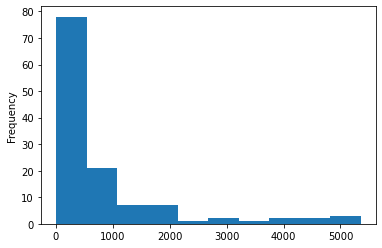

In [312]:
df_hasa = df.query("relation == 'HasA' and ap10_mask_sentence==0")
df_hasa['gains' ] = df_hasa['p@10_mask_sentence'] - df_hasa['p@10_mask_dap']
print(df_hasa[['FREQcount','gains']].corr())
display(df_hasa['gains' ].describe())

display(hasa[['sub_label', 'obj_label',  'obj_sentence', 'subj_anchors', 'obj_dap', 'p@10_mask_sentence', 'p@10_mask_dap', 'FREQcount']].sort_values(by=['FREQcount']).head(50))
# for k, v in dict(zip(hasa['sub_label'], hasa['obj_label'])).items():
#     print(k,'\t', v)
hasa['FREQcount'].plot(kind='hist', bins=10) #.describe()
# 

In [163]:
# subtlex_path = "/Users/chunhua/Desktop/OneDrive/OneDrive\ -\ The\ University\ of\ Melbourne/1.ResearchInUoM-NLP/0.Project/SW-Relation/Data_Preparation/SUBTLEX.US.POS.csv"

subtlex_path = "SUBTLEX.US.POS.csv"
df_subtlex = pd.read_csv(subtlex_path, sep='\t')
df_subtlex = subtlex_df.dropna().reset_index()
print(df_subtlex.columns)
word_to_Lg10WF = dict(zip(df_subtlex['Word'], df_subtlex['Lg10WF'])) #FREQCount, SUBTLCD, Lg10WF

Index(['level_0', 'index', 'Word', 'FREQcount', 'CDcount', 'FREQlow', 'Cdlow',
       'SUBTLWF', 'Lg10WF', 'SUBTLCD', 'Lg10CD', 'Dom_PoS_SUBTLEX',
       'Freq_dom_PoS_SUBTLEX', 'Percentage_dom_PoS', 'All_PoS_SUBTLEX',
       'All_freqs_SUBTLEX'],
      dtype='object')


In [173]:
df['sub_Lg10WF'] = df['sub_label'].apply(lambda x: float(word_to_Lg10WF.get(x, 0)))
# df[['sub_label', 'sub_Lg10WF']].plot()

uncommon_words = list(set(df.query("sub_Lg10WF == 0")['sub_label']))
df_uncommon = df.query("sub_Lg10WF == 0")

In [178]:
print(df_uncommon['p@10_mask_sentence'].mean())
print(df_uncommon['p@10_mask_dap'].mean())
df_uncommon[['sub_label', 'obj_label', 'obj_sentence', 'obj_dap', 'p@10_mask_sentence', 'p@10_mask_dap', 'subj_anchors']]


0.13888888888888887
0.11944444444444444


,sub_label,obj_label,obj_mask_incontext,obj_mask_dap,p@10_mask_incontext,p@10_mask_dap,subj_anchors
84,catapault,"['elastic', 'arms', 'sticks', 'wheels', 'handles']","['legs', 'limits', 'wings', 'power', 'potential', 'teeth', 'flaws', 'problems', 'claws', 'secrets']","['spread', 'occurred', 'happened', 'legs', 'complications', 'consequences', 'symptoms', 'wheels', 'wings', 'triggers']",0.0,0.1,"['rape', 'trauma', 'equivalent', 'accident', 'injury', 'depression', 'poisoning', 'cancer', 'diabetes', 'abduction']"
139,deckchair,"['legs', 'seats', 'arms']","['legs', 'wheels', 'springs', 'feet', 'arms', 'pockets', 'roots', 'holes', 'wings', 'knees']","['legs', 'wheels', 'springs', 'layers', 'holes', 'flaws', 'value', 'purpose', 'feet', 'arms']",0.2,0.2,"['sofa', 'table', 'couch', 'bed', 'chair', 'umbrella', 'desk', 'bench', 'mattress', 'blanket']"
270,millipede,"['legs', 'antenna', 'segments', 'scales']","['legs', 'wings', 'eyes', 'feet', 'teeth', 'sex', 'hair', 'eggs', 'taste', 'ears']","['legs', 'wings', 'eyes', 'feet', 'eggs', 'sex', 'teeth', 'brains', 'lungs', 'hair']",0.1,0.1,"['snail', 'mosquito', 'spider', 'worm', 'beetle', 'ants', 'ant', 'frog', 'cricket', 'insect']"
332,porsche,"['wheels', 'seats', 'doors', 'style', 'leather', 'brakes', 'mirrors']","['speed', 'wings', 'wheels', 'horsepower', 'power', 'brakes', 'character', 'value', 'guts', 'potential']","['speed', 'horsepower', 'power', 'wings', 'wheels', 'brakes', 'character', 'horns', 'engines', 'value']",0.2,0.2,"['audi', 'ferrari', 'bmw', 'mercedes', 'volkswagen', 'cadillac', 'volvo', 'convertible', 'similar', 'mclaren']"
361,rollerskate,"['wheels', 'brakes']","['wheels', 'legs', 'wings', 'feet', 'knees', 'speed', 'toes', 'brakes', 'problems', 'teeth']","['wheels', 'legs', 'advantages', 'feet', 'limitations', 'limits', 'fun', 'potential', 'speed', 'wings']",0.2,0.1,"['skate', 'spin', 'inline', 'roller', 'slide', 'swing', 'vert', 'ski', 'hybrid', 'jump']"
496,castenets,"['string', 'handles']","['limits', 'secrets', 'flaws', 'problems', 'power', 'rules', 'weaknesses', 'consequences', 'limitations', 'value']","['rights', 'benefits', 'issues', 'holes', 'pockets', 'freedom', 'problems', 'bugs', 'consequences', 'rules']",0.0,0.0,"['slaves', 'nets', 'blankets', 'prisons', 'socks', 'forums', 'reddit', 'rings', 'slavery', 'twitter']"
663,castenets,"['wooden', 'Spanish', 'Hispanic', 'percussion', 'discs', 'noisy', 'loud', 'joined', 'circular', 'round', 'small', 'played', 'traditional', 'painted', 'decorative', 'entertaining', 'fun', 'decorated', 'annoying']","['dangerous', 'impossible', 'important', 'evil', 'fun', 'bad', 'hard', 'good', 'boring', 'dead']","['dangerous', 'magic', 'wrong', 'illegal', 'immoral', 'fake', 'impossible', 'bad', 'evil', 'important']",0.1,0.0,"['slaves', 'nets', 'blankets', 'prisons', 'socks', 'forums', 'reddit', 'rings', 'slavery', 'twitter']"
666,catapault,"['elastic', 'ancient', 'medieval', 'historic', 'old', 'dangerous', 'strong', 'big', 'large', 'heavy', 'destructive', 'small', 'entertaining', 'fun']","['dangerous', 'expensive', 'impossible', 'difficult', 'rare', 'hard', 'fun', 'bad', 'tricky', 'dead']","['temporary', 'dangerous', 'wrong', 'painful', 'lethal', 'illegal', 'traumatic', 'rare', 'unavoidable', 'deadly']",0.2,0.1,"['rape', 'trauma', 'equivalent', 'accident', 'injury', 'depression', 'poisoning', 'cancer', 'diabetes', 'abduction']"
729,deckchair,"['wooden', 'striped', 'plastic', 'comfortable', 'furniture', 'light', 'relaxing', 'lightweight', 'carried', 'cheap', 'hired', 'traditional', 'uncomfortable']","['expensive', 'uncomfortable', 'comfortable', 'heavy', 'dangerous', 'boring', 'useless', 'portable', 'awkward', 'ugly']","['expensive', 'warm', 'comfortable', 'handy', 'uncomfortable', 'heavy', 'unnecessary', 'useful', 'portable', 'necessary']",0.2,0.2,"['sofa', 'table', 'couch', 'bed', 'chair', 'umbrella', 'desk', 'bench', 'mattress', 'blanket']"
885,millipede,"['small', 'tiny', 'long', 'black', 'disgusting', 'slow', 'brown', 'alive', 'fat'

<AxesSubplot:ylabel='Frequency'>

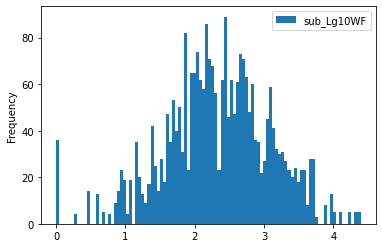

In [165]:
df[['sub_Lg10WF']].plot(kind='hist', bins=100)#head()

In [166]:
len(df.query("ap10_mask_sentence==0 ").index)

560

In [167]:
print(df[['sub_Lg10WF', 'ap10_lsp_dap']].corr())


                     sub_Lg10WF  ap10_mask_incontext
sub_Lg10WF              1.00000              0.05481
ap10_mask_incontext     0.05481              1.00000


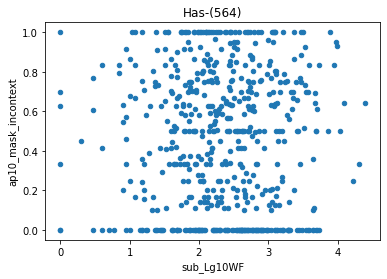

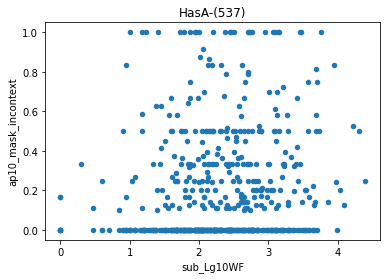

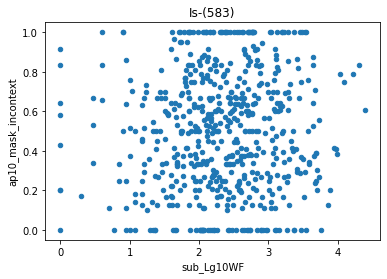

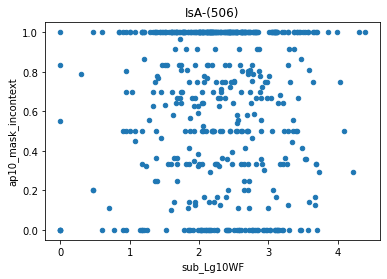

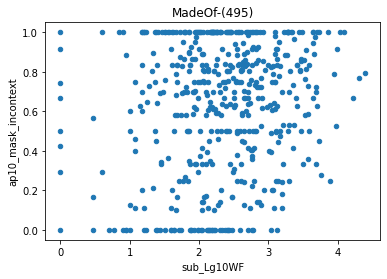

In [168]:
# .corr()
df_miss = df.query("ap10_mask_sentence==0 ") 
df_low_freq = df.query("sub_Lg10WF < 2 ") 

for name, group in df.groupby(by=['relation']):
#     print('-'*40, name, '-'*40)
    group.plot.scatter(x='sub_Lg10WF',
                      y='ap10_lsp_dap',
#                     c='blue',
#                     colormap='blue', 
                    title=f"{name}-({len(group.index)})"
    )



<AxesSubplot:xlabel='sub_Lg10WF', ylabel='ap10_mask_dap'>

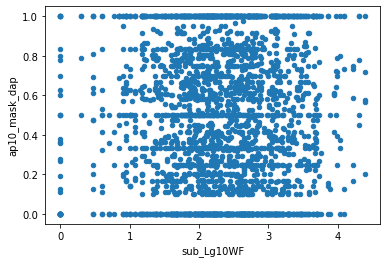

In [122]:
df.plot.scatter(x='sub_Lg10WF',
                  y='ap10_mask_dap',
#                       c='species',
                      colormap='viridis')


In [162]:
df1 = df.query("sub_Lg10WF<10 and ap10_mask_sentence>0.6")
print(len(df1.index))
print(len(set(df1['sub_label'].to_list())))
df1[['sub_label', 'obj_label', 'obj_sentence']]

47
25


,sub_label,obj_label,obj_mask_incontext
57,budgie,"['feathers', 'wings', 'eyes', 'claws', 'legs', 'feet']","['wings', 'feelings', 'ears', 'legs', 'eyes', 'hair', 'fur', 'teeth', 'feet', 'feathers']"
111,cockerel,"['feathers', 'wings', 'feet', 'claws', 'legs', 'thighs', 'eyes']","['wings', 'feathers', 'eggs', 'sex', 'legs', 'breasts', 'eyes', 'lungs', 'ears', 'horns']"
118,colander,"['holes', 'handles']","['holes', 'wheels', 'handles', 'legs', 'problems', 'teeth', 'buttons', 'water', 'parts', 'flaws']"
127,crayfish,"['claws', 'legs', 'antenna', 'eyes', 'fins', 'scales', 'bones']","['legs', 'eyes', 'feelings', 'teeth', 'wings', 'tentacles', 'taste', 'hair', 'feet', 'claws']"
139,deckchair,"['legs', 'seats', 'arms']","['legs', 'wheels', 'springs', 'feet', 'arms', 'pockets', 'roots', 'holes', 'wings', 'knees']"
184,geranium,"['leaves', 'colour', 'flowers', 'roots', 'pollen']","['roots', 'flowers', 'seeds', 'leaves', 'legs', 'flaws', 'secrets', 'water', 'problems', 'fruit']"
200,grater,"['holes', 'handles', 'edges']","['holes', 'wheels', 'teeth', 'blades', 'handles', 'edges', 'tools', 'knives', 'problems', 'purpose']"
218,housefly,"['wings', 'eyes', 'legs', 'blood', 'fur', 'hair']","['wings', 'legs', 'sex', 'eggs', 'eyes', 'taste', 'feet', 'horns', 'feelings', 'guts']"
236,kingfisher,"['feathers', 'wings', 'legs', 'feet', 'eyes']","['wings', 'claws', 'legs', 'teeth', 'feathers', 'horns', 'sex', 'eggs', 'eyes', 'guts']"
270,millipede,"['legs', 'antenna', 'segments', 'scales']","['legs', 'wings', 'eyes', 'feet', 'teeth', 'sex', 'hair', 'eggs', 'taste', 'ears']"


In [ ]:
import seaborn as sns
sns.heatmap(auto_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [48]:
display(df.columns)
display(df.head())
print(len(df.index))
df_miss = df.query("ap10_mask_sentence==0")
print(len(df_miss.index))

Index(['Unnamed: 0', 'uuid', 'masked_sentences', 'obj_label', 'relation',
       'feature_type', 'sub_label', 'sub_position', 'masked_sap',
       'masked_anchor_prompts', 'masked_double_anchor_prompts',
       'obj_mask_incontext', 'obj_mask_incontext_score', 'obj_mask_sap',
       'obj_mask_sap_score', 'subj_anchors', 'subj_anchors_score',
       'masked_sentences_with_subj_anchor', 'subj_anchors_combined',
       'obj_mask_dap', 'obj_mask_dap_score', 'obj_mask_sap_dap',
       'obj_mask_incontext_dap', 'p@1_mask_incontext', 'p@10_mask_incontext',
       'p@1_mask_sap', 'p@10_mask_sap', 'p@1_mask_dap', 'p@10_mask_dap',
       'p@1_mask_sap_dap', 'p@10_mask_sap_dap', 'p@1_mask_incontext_dap',
       'p@10_mask_incontext_dap', 'mrr_mask_sap', 'mrr_mask_dap',
       'mrr_mask_incontext', 'mrr_mask_incontext_dap', 'mrr_mask_sap_dap',
       'ap1_mask_incontext', 'ap10_mask_incontext', 'ap1_mask_sap',
       'ap10_mask_sap', 'ap1_mask_dap', 'ap10_mask_dap', 'ap1_mask_sap_dap',
       'ap1

,Unnamed: 0,uuid,masked_sentences,obj_label,relation,feature_type,sub_label,sub_position,masked_sap,masked_anchor_prompts,masked_double_anchor_prompts,obj_mask_incontext,obj_mask_incontext_score,obj_mask_sap,obj_mask_sap_score,subj_anchors,subj_anchors_score,masked_sentences_with_subj_anchor,subj_anchors_combined,obj_mask_dap,obj_mask_dap_score,obj_mask_sap_dap,obj_mask_incontext_dap,p@1_mask_incontext,p@10_mask_incontext,p@1_mask_sap,p@10_mask_sap,p@1_mask_dap,p@10_mask_dap,p@1_mask_sap_dap,p@10_mask_sap_dap,p@1_mask_incontext_dap,p@10_mask_incontext_dap,mrr_mask_sap,mrr_mask_dap,mrr_mask_incontext,mrr_mask_incontext_dap,mrr_mask_sap_dap,ap1_mask_incontext,ap10_mask_incontext,ap1_mask_sap,ap10_mask_sap,ap1_mask_dap,ap10_mask_dap,ap1_mask_sap_dap,ap10_mask_sap_dap,ap1_mask_incontext_dap,ap10_mask_incontext_dap
0,0,0,['Everyone knows that an accordion has <mask>.'],"['keys', 'buttons', 'handles', 'straps']",Has,"['visual perceptual', 'visual perceptual', 'visual perceptual', 'visual perceptual']",accordion,23,"Usually, we would expect accordion to have <mask> .","['such as accordion and <mask> .', 'such as accordion or <mask> .', ', such as accordion and <mask> .', 'as accordion and <mask> .', 'as accordion or <mask> .', ', such as accordion and <mask> .', ', such as accordion or <mask> .', 'accordion, <mask> or other ', 'accordion, <mask> and other ', ', including accordion and <mask> ', ', including accordion or <mask> ', ', especially accordion and <mask> ', ', especially accordion or <mask> ']","['<mask> such as accordion and [Z] ,', '<mask> such as accordion or [Z] ,', 'such <mask> as accordion and [Z] ,', 'such <mask> as accordion or [Z] ,', 'accordion, [Z] or other <mask> ', 'accordion, [Z] and other <mask> ', '<mask>, including accordion and [Z] ', '<mask>, including accordion or [Z] ', '<mask>, especially accordion and [Z] ', '<mask>, especially accordion or [Z] ']","['strings', 'pedals', 'keys', 'horns', 'bells', 'notes', 'wings', 'chords', 'sound', 'holes']","{'strings': 0.4057776927947998, 'pedals': 0.05027397722005844, 'keys': 0.04464489221572876, 'horns': 0.02894490212202072, 'bells': 0.02892514318227768, 'notes': 0.02517617866396904, 'wings': 0.023598559200763702, 'chords': 0.019234152510762215, 'sound': 0.018166400492191315, 'holes': 0.014821668155491352}",['strings'],{'strings': 0.014949753880500793},"['guitar', 'piano', 'violin', 'keyboard', 'organ', 'recorder', 'trumpet', 'keyboards', 'percussion', 'whistle']","{'guitar': -6.733606610148871, 'piano': -6.971401481909592, 'violin': -7.272116694163713, 'keyboard': -7.881403563002974, 'organ': -8.335647043758136, 'recorder': -8.464742694687564, 'trumpet': -8.511778253776082, 'keyboards': -8.583267003902094, 'percussion': -9.547109535152254, 'whistle': -9.691231244493387}","['Everyone knows that an accordion has <mask>.', 'Everyone knows that an accordion or guitar has <mask>.', 'Everyone knows that an accordion or piano has <mask>.', 'Everyone knows that an accordion or violin has <mask>.', 'Everyone knows that an accordion or keyboard has <mask>.', 'Everyone knows that an accordion or organ has <mask>.', 'Everyone knows that an accordion or recorder has <mask>.', 'Everyone knows that an accordion or trumpet has <mask>.', 'Everyone knows that an accordion or keyboards has <mask>.', 'Everyone knows that an accordion or percussion has <mask>.', 'Everyone knows that an accordion or whistle has <mask>.']",accordion guitar piano violin keyboard organ recorder trumpet keyboards percussion whistle,"['strings', 'keys', 'pedals', 'notes', 'bells', 'sound', 'music', 'wings', 'chords', 'drums']","{'strings': -1.6594811362466841, 'keys': -3.9792004514379684, 'pedals': -4.321941799236625, 'notes': -4.875540686157276, 'bells': -5.008256216809622, 'sound': -5.302652576289231, 'music': -5.371452560917179, 'wings': -5.405157410584509, 'chords': -5.441108006807682, 'drums': -5.498611297892785}","['strings', 'keys', 'pedals', 'notes', 'bells', 'sound', 'music', 'wings', 'chords', '

2685
560


<AxesSubplot:title={'center':'The distribution of error cases over 5 relations '}>

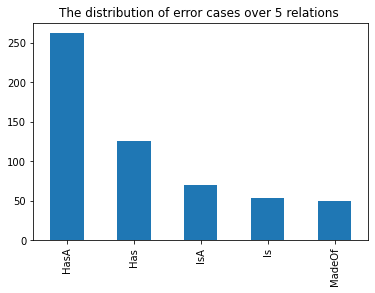

In [50]:
# instance analysis 

df_miss = df.query("ap10_mask_sentence==0")
df_miss['relation'].value_counts().plot(kind='bar', title='The distribution of error cases over 5 relations ')


In [51]:
from collections import Counter, defaultdict 

df_miss = df.query("ap10_mask_sentence==0")
miss_concept = Counter(df_miss['sub_label'])
        
print("#instances mAP@10==0:", len(df_miss.index))
print("#concepts mAP@10==0:", len([item for item in miss_concept.items()]))

display(df_miss['relation'].value_counts() )
count_concept = 0 
count_instance = 0
count_single = 0
df_count_single = []
for name, group in df_miss.groupby(['sub_label']):
    if len(group.index)==1:
        df_count_single.append(group[[ 'sub_label', 'relation', 'obj_label', 'obj_sentence', 'subj_anchors', 'obj_dap', 'feature_type']])
#         display()
    if len(group.index)>=2:
#         display(group[[ 'sub_label', 'relation', 'obj_label', 'obj_sentence', 'subj_anchors', 'obj_dap', 'feature_type']])
        count_concept +=1
        count_instance += len(group.index)

print(f"Concept: multiple rel wrong: {count_concept}")
print(f"Total: {count_concept}, count_instance: #{count_instance}")

print("-"*80)
print(f"Concept: single rel wrong: {len(df_count_single)}")
df_count_single = pd.concat(df_count_single)
display(df_count_single['relation'].value_counts())
display(df_count_single.sample(50))

#instances mAP@10==0: 560
#concepts mAP@10==0: 386


HasA      262
Has       126
IsA        70
Is         53
MadeOf     49
Name: relation, dtype: int64

Concept: multiple rel wrong: 134
Total: 134, count_instance: #308
--------------------------------------------------------------------------------
Concept: single rel wrong: 252


HasA      153
Has        51
IsA        20
Is         15
MadeOf     13
Name: relation, dtype: int64

,sub_label,relation,obj_label,obj_mask_incontext,subj_anchors,obj_mask_dap,feature_type
1898,parakeet,HasA,['tail'],"['problem', 'baby', 'birthday', 'ball', 'mission', 'plan', 'meltdown', 'conversation', 'haircut']","['crow', 'pigeon', 'bird', 'hawk', 'owl', 'gull', 'eagle', 'chicken', 'squirrel', 'goose']","['problem', 'mate', 'nest', 'baby', 'personality', 'wing', 'cage', 'ball', 'birthday', 'bill']",['visual perceptual']
205,harmonica,Has,"['holes', 'gaps']","['strings', 'keys', 'bells', 'chords', 'notes', 'horns', 'pedals', 'sound', 'scales', 'pipes']","['guitar', 'violin', 'piano', 'organ', 'drums', 'keyboard', 'keyboards', 'percussion', 'whistle', 'trumpet']","['strings', 'keys', 'notes', 'sound', 'chords', 'bells', 'beat', 'resonance', 'pedals', 'vibrations']","['visual perceptual', 'visual perceptual']"
2097,peeler,HasA,"['handle', 'blade']","['purpose', 'problem', 'job', 'mission', 'point', 'face', 'reputation', 'plan', 'goal']","['scissors', 'blender', 'knife', 'cutter', 'razor', 'cleaner', 'comb', 'blade', 'knives', 'brush']","['purpose', 'handle', 'problem', 'mission', 'tip', 'motor', 'point', 'job', 'head', 'lid']","['visual perceptual', 'visual perceptual']"
1830,hummingbird,HasA,['tail'],"['problem', 'baby', 'mate', 'plan', 'mission', 'headache', 'meltdown', 'bath', 'message', 'cold']","['butterfly', 'bee', 'hawk', 'butterflies', 'owl', 'swallow', 'moth', 'crow', 'cricket', 'eagle']","['mate', 'song', 'wing', 'sting', 'problem', 'nest', 'mission', 'purpose', 'tail', 'baby']",['visual perceptual']
2145,ketchup,HasA,['bottle'],"['purpose', 'taste', 'price', 'history', 'life', 'story', 'smell', 'point', 'flavor']","['mustard', 'vinegar', 'dressing', 'cheese', 'butter', 'salsa', 'vanilla', 'ranch', 'water', 'sauce']","['taste', 'purpose', 'flavor', 'smell', 'life', 'difference', 'story', 'history', 'texture', 'price']",['visual perceptual']
489,bayonet,Has,"['blades', 'handles']","['teeth', 'holes', 'points', 'power', 'bullets', 'claws', 'wheels', 'weight', 'legs', 'advantages']","['knife', 'pistol', 'sword', 'dagger', 'rifle', 'spear', 'gun', 'handgun', 'revolver', 'sling']","['teeth', 'power', 'points', 'bullets', 'advantages', 'firepower', 'recoil', 'disadvantages', 'holes', 'blades']","['visual perceptual', 'visual perceptual']"
1776,elephant,HasA,"['trunk', 'tail', 'family']","['baby', 'problem', 'calf', 'ball', 'meltdown', 'child', 'cow', 'bath', 'seizure', 'newborn']","['lion', 'tiger', 'gorilla', 'buffalo', 'bear', 'horse', 'camel', 'bull', 'lions', 'tigers']","['baby', 'mate', 'tail', 'hump', 'horn', 'calf', 'rider', 'problem', 'trunk', 'head']","['visual perceptual', 'visual perceptual', 'encyclopaedic']"
1217,camel,MadeOf,['cells'],"['hair', 'skin', 'straw', 'muscle', 'meat', 'fur', 'wool', 'leather', 'flesh']","['donkey', 'horse', 'elephant', 'goat', 'yak', 'lion', 'sheep', 'buffalo', 'cow', 'bull']","['meat', 'muscle', 'fur', 'hair', 'skin', 'wool', 'straw', 'leather', 'cattle', 'ivory']",['encyclopaedic']
2007,toilet,HasA,"['seat', 'lid', 'bowl', 'flush', 'basin', 'tank', 'chain', 'handle', 'hole']","['purpose', 'history', 'function', 'story', 'smell', 'problem', 'face', 'floor', 'design']","['shower', 'sink', 'bathroom', 'sinks', 'bath', 'kitchen', 'showers', 'restroom', 'plumbing', 'refrigerator']","['lid', 'purpose', 'bowl', 'history', 'door', 'lock', 'floor', 'tank', 'seat', 'function']","['visual perceptual', 'visual perceptual', 'visual perceptual', 'encyclopaedic', 'visual perceptual', 'visual perceptual', 'encyclopaedic', 'visual perceptual', 'visual perceptual']"
1727,chestnut,HasA,"['shell', 'case']","['story', 'purpose', 'history', 'problem', 'heart', 'face', 'trunk', 'personality', 'reputation']","['maple', 'oak', 'ash', 'apple', 'cherry', 'pine', 'fir', 'fig', 'pear', 'cinnamon']","['trunk', 'bark', 'purpose', 'taste', 'history', 'fragrance', 'seed', 'scent', 'stigma', 'canopy']","['visual perceptual', 'visual perceptual']"


In [53]:
df.query("sub_label == 'bear'")[[ 'sub_label', 'relation', 'obj_label', 'obj_sentence', 'subj_anchors', 'obj_dap', 'feature_type']]

,sub_label,relation,obj_label,obj_mask_incontext,subj_anchors,obj_mask_dap,feature_type
25,bear,Has,"['fur', 'hair', 'claws', 'teeth', 'species', 'types', 'ears', 'eyes', 'legs']","['teeth', 'claws', 'eyes', 'ears', 'horns', 'wings', 'fur', 'feelings', 'sex', 'legs']","['wolf', 'deer', 'dog', 'tiger', 'lion', 'wolves', 'fox', 'tigers', 'cat', 'eagle']","['teeth', 'claws', 'horns', 'eyes', 'feathers', 'fur', 'wings', 'ears', 'bark', 'feet']","['visual perceptual', 'visual perceptual', 'visual perceptual', 'visual perceptual', 'encyclopaedic', 'encyclopaedic', 'visual perceptual', 'visual perceptual', 'visual perceptual']"
598,bear,Is,"['hairy', 'big', 'large', 'brown', 'fish', 'predatory', 'black', 'scary', 'intimidating', 'frightening', 'white', 'dangerous', 'aggressive', 'polar', 'wild', 'fierce', 'vicious', 'powerful', 'warm']","['dangerous', 'scary', 'evil', 'cute', 'big', 'strong', 'tough', 'ferocious', 'beautiful', 'aggressive']","['wolf', 'deer', 'dog', 'tiger', 'lion', 'wolves', 'fox', 'tigers', 'cat', 'eagle']","['dangerous', 'scary', 'ferocious', 'harmless', 'beautiful', 'aggressive', 'friendly', 'territorial', 'cute', 'fierce']","['visual perceptual', 'visual perceptual', 'visual perceptual', 'visual perceptual', 'functional', 'functional', 'visual perceptual', 'encyclopaedic', 'encyclopaedic', 'encyclopaedic', 'visual perceptual', 'encyclopaedic', 'encyclopaedic', 'encyclopaedic', 'encyclopaedic', 'encyclopaedic', 'encyclopaedic', 'encyclopaedic', 'other perceptual']"
1173,bear,MadeOf,['bones'],"['fur', 'bones', 'bark', 'skin', 'flesh', 'bears', 'meat', 'snow', 'animals', 'wood']","['wolf', 'deer', 'dog', 'tiger', 'lion', 'wolves', 'fox', 'tigers', 'cat', 'eagle']","['fur', 'feathers', 'meat', 'steel', 'flesh', 'ivory', 'bones', 'bone', 'stone', 'skin']",['visual perceptual']
1666,bear,HasA,['mouth'],"['problem', 'plan', 'baby', 'mission', 'home', 'face', 'belly', 'story', 'voice']","['wolf', 'deer', 'dog', 'tiger', 'lion', 'wolves', 'fox', 'tigers', 'cat', 'eagle']","['mate', 'problem', 'baby', 'cub', 'tail', 'pack', 'muzzle', 'mission', 'den', 'plan']",['visual perceptual']
2205,bear,IsA,['toy'],"['predator', 'wolf', 'cub', 'beast', 'dog', 'tiger', 'monster', 'cat', 'tree']","['wolf', 'deer', 'dog', 'tiger', 'lion', 'wolves', 'fox', 'tigers', 'cat', 'eagle']","['bird', 'predator', 'hawk', 'mammal', 'canine', 'pet', 'hunter', 'companion', 'rodent', 'cub']",['taxonomic']
